In [1]:
import os
import json
import itertools
from functools import cache

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

## Object Counts

In [2]:
with open("experiments/obj_counts.json", "r") as f:
    obj_counts = json.load(f)
obj_counts.keys()

dict_keys(['itsttime', 'twittnet', 'skltweet', 'betterxb', 'buildats', 'storesfg', 'ai4code', 'tpsmay22', 'agripred', 'msciedaw', 'ecomsmph'])

In [3]:
def parse_box_plot_data(obj_counts):
    # labels = sorted(obj_counts)
    labels = [
        "itsttime",
        "storesfg",
        "buildats",
        "skltweet",
        "ai4code",
        "agripred",
        "msciedaw",
        "ecomsmph",
    ]
    all_data = [obj_counts[label] for label in labels]

    bp = plt.boxplot(all_data, labels=labels)
    plt.yscale('log')
    plt.close()
    rows_list = []

    for i in range(len(labels)):  # index label median box_top box_bottom whisker_top whisker_bottom
        dict1 = {}
        dict1['index_label'] = i
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['max'] = max(obj_counts[labels[i]])
        rows_list.append(dict1)
    # rows_list = sorted(rows_list, key=lambda row: -row['median'])
    # rows_list = sorted(rows_list, key=lambda row: row['max'])

    return pd.DataFrame(rows_list)

In [4]:
obj_counts_df = parse_box_plot_data(obj_counts)
obj_counts_df

,index_label,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,max
0,0,itsttime,751.0,1387.50,1516.0,132498.0,160936.0,160936
1,1,storesfg,67.0,24677.00,80290.0,82498.0,90339.0,90339
2,2,buildats,843.0,1320.25,2027.5,4849.5,5072.0,5072
3,3,skltweet,1218217.0,1262596.25,1352548.5,1534962.0,1551485.0,1551485
4,4,ai4code,19269909.0,19270560.00,19281434.0,20396989.0,20397220.0,20397220
5,5,agripred,69.0,104.00,129.0,166.0,214.0,214
6,6,msciedaw,79.0,93268.00,165462.0,284259.0,424918.0,424918
7,7,ecomsmph,61.0,736.00,580914.0,1385191.0,1398011.0,34540886


In [5]:
obj_counts_df.to_csv("plots/numobjects.txt", index_label="index", sep=" ")

In [6]:
BOXPLOT_TEMPLATE = r"""
    \begin{tikzpicture}
    \begin{axis}[
        height=45mm,
        width=\linewidth,
        boxplot/draw direction=x,
        axis y line=left,
        axis x line=bottom,
        xmode=log,
        xmajorgrids,
        % xminorgrids,
        enlarge x limits,
        enlarge y limits,
        ytick=__XTICK__,
        yticklabels=__XTICKLABELS__,
    ]
    __ADD_PLOTS__
    \end{axis}
    \end{tikzpicture}"""
ADDPLOT_TEMPLATE = r"""
        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=__LOWER_WHISKER__, lower quartile=__LOWER_QUARTILE__,
                median=__MEDIAN__,
                upper quartile=__UPPER_QUARTILE__, upper whisker=__UPPER_WHISKER__,
            },
        ] coordinates {};
"""

In [7]:
labels = obj_counts_df["label"].values
xtick = f"{{{', '.join(str(i+1) for i in range(len(obj_counts_df)))}}}"
xticklabels = f"{{{', '.join(labels)}}}"
addplots = "\n".join([
    ADDPLOT_TEMPLATE.replace("__LOWER_WHISKER__", str(row["lower_whisker"])).replace("__MEDIAN__", str(row["median"])).replace("__LOWER_QUARTILE__", str(row["lower_quartile"])).replace("__UPPER_QUARTILE__", str(row["upper_quartile"])).replace("__UPPER_WHISKER__", str(row["upper_whisker"]))
    for i, row in obj_counts_df.iterrows()
])
print(BOXPLOT_TEMPLATE.replace("__XTICK__", xtick).replace("__XTICKLABELS__", xticklabels).replace("__ADD_PLOTS__", addplots))


    \begin{tikzpicture}
    \begin{axis}[
        height=45mm,
        width=\linewidth,
        boxplot/draw direction=x,
        axis y line=left,
        axis x line=bottom,
        xmode=log,
        xmajorgrids,
        % xminorgrids,
        enlarge x limits,
        enlarge y limits,
        ytick={1, 2, 3, 4, 5, 6, 7, 8},
        yticklabels={itsttime, storesfg, buildats, skltweet, ai4code, agripred, msciedaw, ecomsmph},
    ]
    
        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=751.0, lower quartile=1387.5,
                median=1516.0,
                upper quartile=132498.0, upper whisker=160936.0,
            },
        ] coordinates {};


        \addplot+ [
            objcount,
            boxplot prepared={
                lower whisker=67.0, lower quartile=24677.0,
                median=80290.0,
                upper quartile=82498.0, upper whisker=90339.0,
            },
        ] coordinates {};


        \add

## Result Paths

In [8]:
result_dir = "result"

In [9]:
all_nb_paths = {
    "ai4code":{
        "pga": f"{result_dir}/exp1_pga_ai4code/expstat.json",
        "snp": f"{result_dir}/exp1_snp_ai4code/expstat.json",
        "dill": f"{result_dir}/exp1_dill_ai4code/expstat.json",
        "shev": f"{result_dir}/exp1_shev_ai4code/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_ai4code/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_ai4code/expstat.json",
        "criu": f"{result_dir}/exp1_criu_ai4code/expstat.json",
        "crii": f"{result_dir}/exp1_crii_ai4code/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_ai4code/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_ai4code/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_ai4code/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_ai4code/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_ai4code/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_ai4code/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_ai4code/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_ai4code/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_ai4code/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_ai4code/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_ai4code/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_ai4code/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_ai4code/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_ai4code/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_ai4code/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_ai4code/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_ai4code/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_ai4code/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_ai4code/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_ai4code/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_ai4code/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_ai4code/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_ai4code/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_ai4code/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_ai4code/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_ai4code/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_ai4code/expstat.json",
        "prand": f"{result_dir}/exp1_prand_ai4code/expstat.json",
        # "pnv": f"{result_dir}/exp1_pnv_ai4code/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_ai4code/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_ai4code/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_ai4code/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_ai4code/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_ai4code/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_ai4code/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_ai4code/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_ai4code/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_ai4code/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_ai4code/expstat.json",
    },
    "tpsmay22":{
        "pga": f"{result_dir}/exp1_pga_tpsmay22/expstat.json",
        "snp": f"{result_dir}/exp1_snp_tpsmay22/expstat.json",
        "dill": f"{result_dir}/exp1_dill_tpsmay22/expstat.json",
        "shev": f"{result_dir}/exp1_shev_tpsmay22/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_tpsmay22/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_tpsmay22/expstat.json",
        "criu": f"{result_dir}/exp1_criu_tpsmay22/expstat.json",
        "crii": f"{result_dir}/exp1_crii_tpsmay22/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_tpsmay22/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_tpsmay22/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_tpsmay22/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_tpsmay22/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_tpsmay22/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_tpsmay22/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_tpsmay22/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_tpsmay22/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_tpsmay22/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_tpsmay22/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_tpsmay22/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_tpsmay22/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_tpsmay22/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_tpsmay22/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_tpsmay22/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_tpsmay22/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_tpsmay22/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_tpsmay22/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_tpsmay22/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_tpsmay22/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_tpsmay22/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_tpsmay22/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_tpsmay22/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_tpsmay22/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_tpsmay22/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_tpsmay22/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_tpsmay22/expstat.json",
        "prand": f"{result_dir}/exp1_prand_tpsmay22/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_tpsmay22/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_tpsmay22/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_tpsmay22/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_tpsmay22/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_tpsmay22/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_tpsmay22/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_tpsmay22/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_tpsmay22/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_tpsmay22/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_tpsmay22/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_tpsmay22/expstat.json",
    },
    "betterxb":{
        "pga": f"{result_dir}/exp1_pga_betterxb/expstat.json",
        "snp": f"{result_dir}/exp1_snp_betterxb/expstat.json",
        "dill": f"{result_dir}/exp1_dill_betterxb/expstat.json",
        "shev": f"{result_dir}/exp1_shev_betterxb/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_betterxb/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_betterxb/expstat.json",
        "criu": f"{result_dir}/exp1_criu_betterxb/expstat.json",
        "crii": f"{result_dir}/exp1_crii_betterxb/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_betterxb/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_betterxb/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_betterxb/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_betterxb/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_betterxb/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_betterxb/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_betterxb/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_betterxb/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_betterxb/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_betterxb/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_betterxb/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_betterxb/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_betterxb/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_betterxb/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_betterxb/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_betterxb/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_betterxb/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_betterxb/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_betterxb/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_betterxb/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_betterxb/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_betterxb/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_betterxb/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_betterxb/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_betterxb/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_betterxb/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_betterxb/expstat.json",
        "prand": f"{result_dir}/exp1_prand_betterxb/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_betterxb/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_betterxb/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_betterxb/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_betterxb/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_betterxb/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_betterxb/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_betterxb/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_betterxb/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_betterxb/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_betterxb/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_betterxb/expstat.json",
    },
    "skltweet":{
        "pga": f"{result_dir}/exp1_pga_skltweet/expstat.json",
        "snp": f"{result_dir}/exp1_snp_skltweet/expstat.json",
        "snz": f"{result_dir}/exp1_snz_skltweet/expstat.json",
        "snx": f"{result_dir}/exp1_snx_skltweet/expstat.json",
        "dill": f"{result_dir}/exp1_dill_skltweet/expstat.json",
        "shev": f"{result_dir}/exp1_shev_skltweet/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_skltweet/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_skltweet/expstat.json",
        "criu": f"{result_dir}/exp1_criu_skltweet/expstat.json",
        "crii": f"{result_dir}/exp1_crii_skltweet/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_skltweet/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_skltweet/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_skltweet/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_skltweet/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_skltweet/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_skltweet/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_skltweet/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_skltweet/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_skltweet/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_skltweet/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_skltweet/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_skltweet/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_skltweet/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_skltweet/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_skltweet/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_skltweet/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_skltweet/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_skltweet/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_skltweet/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_skltweet/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_skltweet/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_skltweet/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_skltweet/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_skltweet/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_skltweet/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_skltweet/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_skltweet/expstat.json",
        "prand": f"{result_dir}/exp1_prand_skltweet/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_skltweet/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_skltweet/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_skltweet/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_skltweet/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_skltweet/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_skltweet/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_skltweet/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_skltweet/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_skltweet/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_skltweet/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_skltweet/expstat.json",
        "pgaz": f"{result_dir}/exp1_pgaz_skltweet/expstat.json",
    },
    "twittnet":{
        "pga": f"{result_dir}/exp1_pga_twittnet/expstat.json",
        "snp": f"{result_dir}/exp1_snp_twittnet/expstat.json",
        "dill": f"{result_dir}/exp1_dill_twittnet/expstat.json",
        "shev": f"{result_dir}/exp1_shev_twittnet/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_twittnet/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_twittnet/expstat.json",
        "criu": f"{result_dir}/exp1_criu_twittnet/expstat.json",
        "crii": f"{result_dir}/exp1_crii_twittnet/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_twittnet/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_twittnet/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_twittnet/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_twittnet/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_twittnet/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_twittnet/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_twittnet/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_twittnet/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_twittnet/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_twittnet/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_twittnet/expstat.json",
        "pgcache1m": f"{result_dir}/exp1_pgcache1m_twittnet/expstat.json",
        "pgcache15m": f"{result_dir}/exp1_pgcache15m_twittnet/expstat.json",
        "pgcache31m": f"{result_dir}/exp1_pgcache31m_twittnet/expstat.json",
        "pgcache62m": f"{result_dir}/exp1_pgcache62m_twittnet/expstat.json",
        "pgcache125m": f"{result_dir}/exp1_pgcache125m_twittnet/expstat.json",
        "pgcache250m": f"{result_dir}/exp1_pgcache250m_twittnet/expstat.json",
        "pgcache500m": f"{result_dir}/exp1_pgcache500m_twittnet/expstat.json",
        "pgcache1g": f"{result_dir}/exp1_pgcache1g_twittnet/expstat.json",
        "pgcache2g": f"{result_dir}/exp1_pgcache2g_twittnet/expstat.json",
        "pgcache4g": f"{result_dir}/exp1_pgcache4g_twittnet/expstat.json",
        "pgcache8g": f"{result_dir}/exp1_pgcache8g_twittnet/expstat.json",
        "pgcache10g": f"{result_dir}/exp1_pgcache10g_twittnet/expstat.json",
        "pgcache16g": f"{result_dir}/exp1_pgcache16g_twittnet/expstat.json",
        "pgcache100g": f"{result_dir}/exp1_pgcache100g_twittnet/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_twittnet/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_twittnet/expstat.json",
        # "prand": f"{result_dir}/exp1_prand_twittnet/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_twittnet/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_twittnet/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_twittnet/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_twittnet/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_twittnet/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_twittnet/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_twittnet/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_twittnet/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_twittnet/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_twittnet/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_twittnet/expstat.json",
    },
    "agripred":{
        "pga": f"{result_dir}/exp1_pga_agripred/expstat.json",
        "snp": f"{result_dir}/exp1_snp_agripred/expstat.json",
        "dill": f"{result_dir}/exp1_dill_agripred/expstat.json",
        "shev": f"{result_dir}/exp1_shev_agripred/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_agripred/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_agripred/expstat.json",
        "criu": f"{result_dir}/exp1_criu_agripred/expstat.json",
        "crii": f"{result_dir}/exp1_crii_agripred/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_agripred/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_agripred/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_agripred/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_agripred/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_agripred/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_agripred/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_agripred/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_agripred/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_agripred/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_agripred/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_agripred/expstat.json",
        # "pgcache1m": f"{result_dir}/exp1_pgcache1m_agripred/expstat.json",
        # "pgcache15m": f"{result_dir}/exp1_pgcache15m_agripred/expstat.json",
        # "pgcache31m": f"{result_dir}/exp1_pgcache31m_agripred/expstat.json",
        # "pgcache62m": f"{result_dir}/exp1_pgcache62m_agripred/expstat.json",
        # "pgcache125m": f"{result_dir}/exp1_pgcache125m_agripred/expstat.json",
        # "pgcache250m": f"{result_dir}/exp1_pgcache250m_agripred/expstat.json",
        # "pgcache500m": f"{result_dir}/exp1_pgcache500m_agripred/expstat.json",
        # "pgcache1g": f"{result_dir}/exp1_pgcache1g_agripred/expstat.json",
        # "pgcache2g": f"{result_dir}/exp1_pgcache2g_agripred/expstat.json",
        # "pgcache4g": f"{result_dir}/exp1_pgcache4g_agripred/expstat.json",
        # "pgcache8g": f"{result_dir}/exp1_pgcache8g_agripred/expstat.json",
        # "pgcache10g": f"{result_dir}/exp1_pgcache10g_agripred/expstat.json",
        # "pgcache16g": f"{result_dir}/exp1_pgcache16g_agripred/expstat.json",
        # "pgcache100g": f"{result_dir}/exp1_pgcache100g_agripred/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_agripred/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_agripred/expstat.json",
        "prand": f"{result_dir}/exp1_prand_agripred/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_agripred/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_agripred/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_agripred/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_agripred/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_agripred/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_agripred/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_agripred/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_agripred/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_agripred/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_agripred/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_agripred/expstat.json",
    },
    "msciedaw":{
        "pga": f"{result_dir}/exp1_pga_msciedaw/expstat.json",
        "snp": f"{result_dir}/exp1_snp_msciedaw/expstat.json",
        "dill": f"{result_dir}/exp1_dill_msciedaw/expstat.json",
        "shev": f"{result_dir}/exp1_shev_msciedaw/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_msciedaw/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_msciedaw/expstat.json",
        "criu": f"{result_dir}/exp1_criu_msciedaw/expstat.json",
        "crii": f"{result_dir}/exp1_crii_msciedaw/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_msciedaw/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_msciedaw/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_msciedaw/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_msciedaw/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_msciedaw/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_msciedaw/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_msciedaw/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_msciedaw/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_msciedaw/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_msciedaw/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_msciedaw/expstat.json",
        # "pgcache1m": f"{result_dir}/exp1_pgcache1m_msciedaw/expstat.json",
        # "pgcache15m": f"{result_dir}/exp1_pgcache15m_msciedaw/expstat.json",
        # "pgcache31m": f"{result_dir}/exp1_pgcache31m_msciedaw/expstat.json",
        # "pgcache62m": f"{result_dir}/exp1_pgcache62m_msciedaw/expstat.json",
        # "pgcache125m": f"{result_dir}/exp1_pgcache125m_msciedaw/expstat.json",
        # "pgcache250m": f"{result_dir}/exp1_pgcache250m_msciedaw/expstat.json",
        # "pgcache500m": f"{result_dir}/exp1_pgcache500m_msciedaw/expstat.json",
        # "pgcache1g": f"{result_dir}/exp1_pgcache1g_msciedaw/expstat.json",
        # "pgcache2g": f"{result_dir}/exp1_pgcache2g_msciedaw/expstat.json",
        # "pgcache4g": f"{result_dir}/exp1_pgcache4g_msciedaw/expstat.json",
        # "pgcache8g": f"{result_dir}/exp1_pgcache8g_msciedaw/expstat.json",
        # "pgcache10g": f"{result_dir}/exp1_pgcache10g_msciedaw/expstat.json",
        # "pgcache16g": f"{result_dir}/exp1_pgcache16g_msciedaw/expstat.json",
        # "pgcache100g": f"{result_dir}/exp1_pgcache100g_msciedaw/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_msciedaw/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_msciedaw/expstat.json",
        "prand": f"{result_dir}/exp1_prand_msciedaw/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_msciedaw/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_msciedaw/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_msciedaw/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_msciedaw/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_msciedaw/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_msciedaw/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_msciedaw/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_msciedaw/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_msciedaw/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_msciedaw/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_msciedaw/expstat.json",
    },
    "ecomsmph":{
        "pga": f"{result_dir}/exp1_pga_ecomsmph/expstat.json",
        "snp": f"{result_dir}/exp1_snp_ecomsmph/expstat.json",
        "dill": f"{result_dir}/exp1_dill_ecomsmph/expstat.json",
        "shev": f"{result_dir}/exp1_shev_ecomsmph/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_ecomsmph/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_ecomsmph/expstat.json",
        "criu": f"{result_dir}/exp1_criu_ecomsmph/expstat.json",
        "crii": f"{result_dir}/exp1_crii_ecomsmph/expstat.json",
        "pgcache4": f"{result_dir}/exp1_pgcache4_ecomsmph/expstat.json",
        "pgcache16": f"{result_dir}/exp1_pgcache16_ecomsmph/expstat.json",
        "pgcache64": f"{result_dir}/exp1_pgcache64_ecomsmph/expstat.json",
        "pgcache256": f"{result_dir}/exp1_pgcache256_ecomsmph/expstat.json",
        "pgcache1024": f"{result_dir}/exp1_pgcache1024_ecomsmph/expstat.json",
        "pgcache4096": f"{result_dir}/exp1_pgcache4096_ecomsmph/expstat.json",
        "pgcache16384": f"{result_dir}/exp1_pgcache16384_ecomsmph/expstat.json",
        "pgcache65536": f"{result_dir}/exp1_pgcache65536_ecomsmph/expstat.json",
        "pgcache262144": f"{result_dir}/exp1_pgcache262144_ecomsmph/expstat.json",
        "pgcache1048576": f"{result_dir}/exp1_pgcache1048576_ecomsmph/expstat.json",
        "pgcache0": f"{result_dir}/exp1_pgcache0_ecomsmph/expstat.json",
        # "pgcache1m": f"{result_dir}/exp1_pgcache1m_ecomsmph/expstat.json",
        # "pgcache15m": f"{result_dir}/exp1_pgcache15m_ecomsmph/expstat.json",
        # "pgcache31m": f"{result_dir}/exp1_pgcache31m_ecomsmph/expstat.json",
        # "pgcache62m": f"{result_dir}/exp1_pgcache62m_ecomsmph/expstat.json",
        # "pgcache125m": f"{result_dir}/exp1_pgcache125m_ecomsmph/expstat.json",
        # "pgcache250m": f"{result_dir}/exp1_pgcache250m_ecomsmph/expstat.json",
        # "pgcache500m": f"{result_dir}/exp1_pgcache500m_ecomsmph/expstat.json",
        # "pgcache1g": f"{result_dir}/exp1_pgcache1g_ecomsmph/expstat.json",
        # "pgcache2g": f"{result_dir}/exp1_pgcache2g_ecomsmph/expstat.json",
        # "pgcache4g": f"{result_dir}/exp1_pgcache4g_ecomsmph/expstat.json",
        # "pgcache8g": f"{result_dir}/exp1_pgcache8g_ecomsmph/expstat.json",
        # "pgcache10g": f"{result_dir}/exp1_pgcache10g_ecomsmph/expstat.json",
        # "pgcache16g": f"{result_dir}/exp1_pgcache16g_ecomsmph/expstat.json",
        # "pgcache100g": f"{result_dir}/exp1_pgcache100g_ecomsmph/expstat.json",
        "pgnoavf": f"{result_dir}/exp1_pgnoavf_ecomsmph/expstat.json",
        "pgcache0noavf": f"{result_dir}/exp1_pgcache0noavf_ecomsmph/expstat.json",
        "prand": f"{result_dir}/exp1_prand_ecomsmph/expstat.json",
        "pnv": f"{result_dir}/exp1_pnv_ecomsmph/expstat.json",
        "pnb": f"{result_dir}/exp1_pnb_ecomsmph/expstat.json",
        "pfl": f"{result_dir}/exp1_pfl_ecomsmph/expstat.json",
        "pg0": f"{result_dir}/exp1_pg0_ecomsmph/expstat.json",
        "pg1": f"{result_dir}/exp1_pg1_ecomsmph/expstat.json",
        "pgl": f"{result_dir}/exp1_pgl_ecomsmph/expstat.json",
        "pgnostatic": f"{result_dir}/exp1_pgnostatic_ecomsmph/expstat.json",
        "pgnoavl": f"{result_dir}/exp1_pgnoavl_ecomsmph/expstat.json",
        "pgnoavlstatic": f"{result_dir}/exp1_pgnoavlstatic_ecomsmph/expstat.json",
        "pglnoavlstatic": f"{result_dir}/exp1_pglnoavlstatic_ecomsmph/expstat.json",
        "pglnostatic": f"{result_dir}/exp1_pglnostatic_ecomsmph/expstat.json",
    },
    "ai4codeexc":{
        "pga": f"{result_dir}/exp1_pga_ai4code[exc]/expstat.json",
        "snp": f"{result_dir}/exp1_snp_ai4code[exc]/expstat.json",
        "dill": f"{result_dir}/exp1_snp_ai4code[exc]/expstat.json",
        "shev": f"{result_dir}/exp1_shev_ai4code[exc]/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_ai4code[exc]/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_ai4code[exc]/expstat.json",
        "criu": f"{result_dir}/exp1_criu_ai4code[exc]/expstat.json",
        "crii": f"{result_dir}/exp1_crii_ai4code[exc]/expstat.json",
    },
    "skltweetexc":{
        "pga": f"{result_dir}/exp1_pga_skltweet[exc]/expstat.json",
        "snp": f"{result_dir}/exp1_snp_skltweet[exc]/expstat.json",
        "dill": f"{result_dir}/exp1_snp_skltweet[exc]/expstat.json",
        "shev": f"{result_dir}/exp1_shev_skltweet[exc]/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_skltweet[exc]/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_skltweet[exc]/expstat.json",
        "criu": f"{result_dir}/exp1_criu_skltweet[exc]/expstat.json",
    },
    "agripredexc":{
        "pga": f"{result_dir}/exp1_pga_agripred[exc]/expstat.json",
        "snp": f"{result_dir}/exp1_snp_agripred[exc]/expstat.json",
        "dill": f"{result_dir}/exp1_snp_agripred[exc]/expstat.json",
        "shev": f"{result_dir}/exp1_shev_agripred[exc]/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_agripred[exc]/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_agripred[exc]/expstat.json",
        "criu": f"{result_dir}/exp1_criu_agripred[exc]/expstat.json",
    },
    "msciedawexc":{
        "pga": f"{result_dir}/exp1_pga_msciedaw[exc]/expstat.json",
        "snp": f"{result_dir}/exp1_snp_msciedaw[exc]/expstat.json",
        "dill": f"{result_dir}/exp1_snp_msciedaw[exc]/expstat.json",
        "shev": f"{result_dir}/exp1_shev_msciedaw[exc]/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_msciedaw[exc]/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_msciedaw[exc]/expstat.json",
        "criu": f"{result_dir}/exp1_criu_msciedaw[exc]/expstat.json",
    },
    "ecomsmphexc":{
        "pga": f"{result_dir}/exp1_pga_ecomsmph[exc]/expstat.json",
        "snp": f"{result_dir}/exp1_snp_ecomsmph[exc]/expstat.json",
        "dill": f"{result_dir}/exp1_snp_ecomsmph[exc]/expstat.json",
        "shev": f"{result_dir}/exp1_shev_ecomsmph[exc]/expstat.json",
        "zodb": f"{result_dir}/exp1_zodb_ecomsmph[exc]/expstat.json",
        "zosp": f"{result_dir}/exp1_zosp_ecomsmph[exc]/expstat.json",
        "criu": f"{result_dir}/exp1_criu_ecomsmph[exc]/expstat.json",
    },
}

BASELINES = ["snp", "dill", "shev", "zodb", "zosp"]

## 1. Storage and Save Time

In [10]:
def read_result(nb_path):
    with open(nb_path, "r") as f:
        return json.load(f)

def parse_result(nb_path):
    result = read_result(nb_path)
    total_lock_time = sum(result["lock_times"])
    total_join_time = sum(result["join_times"])
    total_dump_time = sum(stat["time_s"] for stat in result["dumps"])
    load_times = [stat["time_s"] for stat in result["loads"]]
    return {
        "storage_gb": max(dump["storage_b"] / 1e9 for dump in result["dumps"]),
        "sum_save_s": total_lock_time + total_dump_time,  # join already included in dump
        "avg_save_s": (total_lock_time + total_dump_time) / len(result["dumps"]),  # join already included in dump
        "median_load_s": np.median(load_times),  # load
        "n": len(result["dumps"])
    }

def parse_nb(nb_paths, baselines):
    results = {}
    for sut in [*baselines, *list(nb_paths)]:
        nb_path = nb_paths[sut]
        try:
            result = parse_result(nb_path)
        except FileNotFoundError:
            print(f"WARNING: Missing {nb_path}")
            continue
        for key in list(result):
            rel_val = min(0 if f"{baseline}_{key}" not in results or result[key] == 0 else results[f"{baseline}_{key}"] / result[key] for baseline in baselines) if sut not in baselines else 1.0
            result[f"rel_{key}"] = (
                (f"{round(rel_val, ndigits=1)}" + r"$\times$")
                if rel_val > 1.0
                else (f"{round(rel_val, ndigits=2)}" + r"$\times$")
            )
        for k, v in result.items():
            results[f"{sut}_{k}"] = v
    return results

def parse_all_nbs(all_nb_paths, baselines=BASELINES):
    return {nb: parse_nb(nb_paths, baselines) for nb, nb_paths in all_nb_paths.items()}

all_results = parse_all_nbs(all_nb_paths)

/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
# nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
nbs = ['skltweet', 'ai4code', 'agripred', 'msciedaw', 'ecomsmph']
suts = [
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pga",
]

def extract_less(suts, baselines=BASELINES):
    nb_paths = {nb: {sut: all_nb_paths[nb][sut] for sut in suts if sut in all_nb_paths[nb]} for nb in all_nb_paths}
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "nb": nb,
        **all_results[nb],
    } for nb in nbs])


exp_i_df = extract_less(list(all_nb_paths['skltweet']))
exp_i_df

,nb,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_n,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,snp_rel_n,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_n,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,dill_rel_n,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_n,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,shev_rel_n,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_n,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zodb_rel_n,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_n,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,zosp_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n,snz_storage_gb,snz_sum_save_s,snz_avg_save_s,snz_median_load_s,snz_n,snz_rel_storage_gb,snz_rel_sum_save_s,snz_rel_avg_save_s,snz_rel_median_load_s,snz_rel_n,snx_storage_gb,snx_sum_save_s,snx_avg_save_s,snx_median_load_s,snx_n,snx_rel_storage_gb,snx_rel_sum_save_s,snx_rel_avg_save_s,snx_rel_median_load_s,snx_rel_n,criu_storage_gb,criu_sum_save_s,criu_avg_save_s,criu_median_load_s,criu_n,criu_rel_storage_gb,criu_rel_sum_save_s,criu_rel_avg_save_s,criu_rel_median_load_s,criu_rel_n,crii_storage_gb,crii_sum_save_s,crii_avg_save_s,crii_median_load_s,crii_n,crii_rel_storage_gb,crii_rel_sum_save_s,crii_rel_avg_save_s,crii_rel_median_load_s,crii_rel_n,pgcache4_storage_gb,pgcache4_sum_save_s,pgcache4_avg_save_s,pgcache4_median_load_s,pgcache4_n,pgcache4_rel_storage_gb,pgcache4_rel_sum_save_s,pgcache4_rel_avg_save_s,pgcache4_rel_median_load_s,pgcache4_rel_n,pgcache16_storage_gb,pgcache16_sum_save_s,pgcache16_avg_save_s,pgcache16_median_load_s,pgcache16_n,pgcache16_rel_storage_gb,pgcache16_rel_sum_save_s,pgcache16_rel_avg_save_s,pgcache16_rel_median_load_s,pgcache16_rel_n,pgcache64_storage_gb,pgcache64_sum_save_s,pgcache64_avg_save_s,pgcache64_median_load_s,pgcache64_n,pgcache64_rel_storage_gb,pgcache64_rel_sum_save_s,pgcache64_rel_avg_save_s,pgcache64_rel_median_load_s,pgcache64_rel_n,pgcache256_storage_gb,pgcache256_sum_save_s,pgcache256_avg_save_s,pgcache256_median_load_s,pgcache256_n,pgcache256_rel_storage_gb,pgcache256_rel_sum_save_s,pgcache256_rel_avg_save_s,pgcache256_rel_median_load_s,pgcache256_rel_n,pgcache1024_storage_gb,pgcache1024_sum_save_s,pgcache1024_avg_save_s,pgcache1024_median_load_s,pgcache1024_n,pgcache1024_rel_storage_gb,pgcache1024_rel_sum_save_s,pgcache1024_rel_avg_save_s,pgcache1024_rel_median_load_s,pgcache1024_rel_n,pgcache4096_storage_gb,pgcache4096_sum_save_s,pgcache4096_avg_save_s,pgcache4096_median_load_s,pgcache4096_n,pgcache4096_rel_storage_gb,pgcache4096_rel_sum_save_s,pgcache4096_rel_avg_save_s,pgcache4096_rel_median_load_s,pgcache4096_rel_n,pgcache16384_storage_gb,pgcache16384_sum_save_s,pgcache16384_avg_save_s,pgcache16384_median_load_s,pgcache16384_n,pgcache16384_rel_storage_gb,pgcache16384_rel_sum_save_s,pgcache16384_rel_avg_save_s,pgcache16384_rel_median_load_s,pgcache16384_rel_n,pgcache65536_storage_gb,pgcache65536_sum_save_s,pgcache65536_avg_save_s,pgcache65536_median_load_s,pgcache65536_n,pgcache65536_rel_storage_gb,pgcache65536_rel_sum_save_s,pgcache65536_rel_avg_save_s,pgcache65536_rel_median_load_s,pgcache65536_rel_n,pgcache262144_storage_gb,pgcache262144_sum_save_s,pgcache262144_avg_save_s,pgcache262144_median_load_s,pgcache262144_n,pgcache262144_rel_storage_gb,pgcache262144_rel_sum_save_s,pgcache262144_rel_avg_save_s,pgcache262144_rel_median_load_s,pgcache262144_rel_n,pgcache1048576_storage_gb,pgcache1048576_sum_save_s,pgcache1048576_avg_save_s,pgcache1048576_median_load_s,pgcache1048576_n,pgcache1048576_rel_storage_gb,pgcache1048576_rel_sum_save_s,pgcache1048576_rel_avg_save_s,pgcache1048576_rel_median_load_s,pgcache

In [12]:
exp_i_df["est_mut_rate"] = ((exp_i_df.snp_n - 1) * exp_i_df.pga_storage_gb / exp_i_df.snp_storage_gb - 1) / (exp_i_df.snp_n - 2)
print(f"Mean mutation rate: {exp_i_df['est_mut_rate'].mean()}")
exp_i_df[["nb", "est_mut_rate", "pga_rel_avg_save_s"]]

Mean mutation rate: 0.06519922656090349


,nb,est_mut_rate,pga_rel_avg_save_s
0,skltweet,0.016857,5.7$\times$
1,ai4code,0.133365,3.2$\times$
2,agripred,0.100073,4.9$\times$
3,msciedaw,0.072636,2.7$\times$
4,ecomsmph,0.003066,12.4$\times$


In [13]:
print(exp_i_df.pg0_storage_gb / exp_i_df.pga_storage_gb)
print(exp_i_df.pg1_storage_gb / exp_i_df.pga_storage_gb)
print(exp_i_df.pfl_storage_gb / exp_i_df.pga_storage_gb)
print(exp_i_df.pg0_sum_save_s / exp_i_df.pga_sum_save_s)
print(exp_i_df.pg1_sum_save_s / exp_i_df.pga_sum_save_s)
print(exp_i_df.pfl_sum_save_s / exp_i_df.pga_sum_save_s)

0    2.510462
1    1.410553
2    1.500078
3    4.543201
4    1.685496
dtype: float64
0    2.510462
1    1.410556
2    1.500078
3    4.543201
4    1.685496
dtype: float64
0    1.303718
1    1.106367
2    0.999721
3    4.401663
4    1.420814
dtype: float64
0    1.191923
1    1.331131
2    5.147180
3    1.851773
4    1.383589
dtype: float64
0    1.209829
1    1.339618
2    5.048020
3    2.062054
4    1.364306
dtype: float64
0    1.934767
1    0.899154
2    4.932181
3    2.128759
4    1.008552
dtype: float64


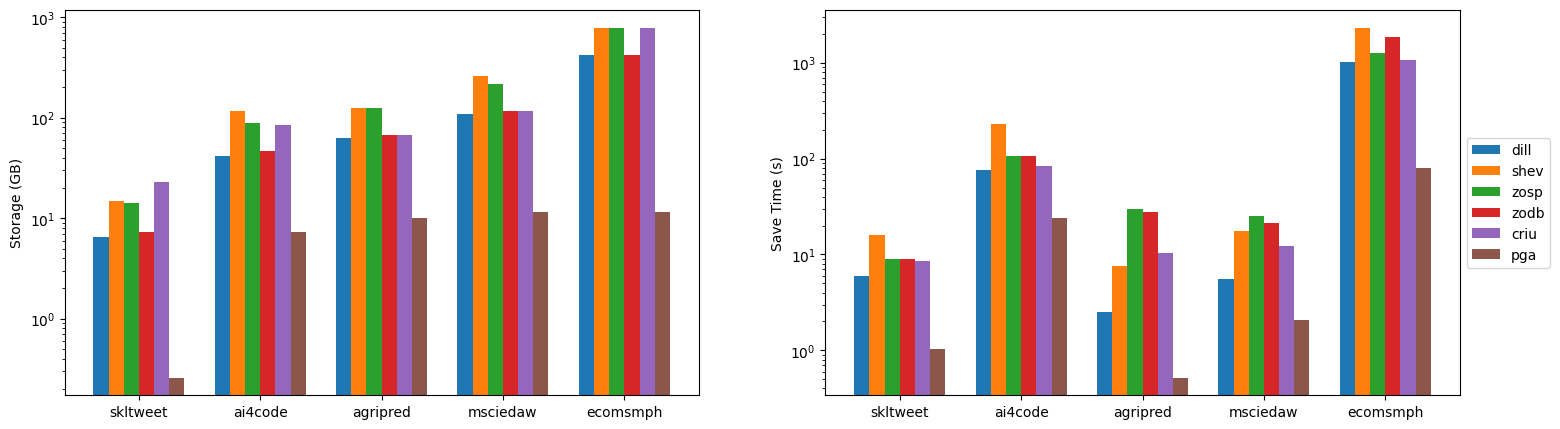

In [14]:
def exp_i_df_plot(exp_i_df, suts):
    SZ, RS = 5, 1.8
    fig, axs = plt.subplots(ncols=2, figsize=(SZ * RS * 2, SZ))
    
    ax = axs[0]
    xs = np.arange(len(exp_i_df["nb"].values))
    bar_width = 1.0 / (len(suts) + 2)
    bar_multiplier = -(len(suts) - 1) / 2
    for sut in suts:
        offset = bar_width * bar_multiplier
        rects = ax.bar(xs + offset, exp_i_df[f"{sut}_storage_gb"], bar_width, label=sut)
        bar_multiplier += 1
    ax.set_xticks(xs, exp_i_df["nb"])
    ax.set_yscale("log")
    ax.set_ylabel("Storage (GB)")
    
    ax = axs[1]
    xs = np.arange(len(exp_i_df["nb"].values))
    bar_width = 1.0 / (len(suts) + 2)
    bar_multiplier = -(len(suts) - 1) / 2
    for sut in suts:
        offset = bar_width * bar_multiplier
        rects = ax.bar(xs + offset, exp_i_df[f"{sut}_avg_save_s"], bar_width, label=sut)
        bar_multiplier += 1
    ax.set_xticks(xs, exp_i_df["nb"])
    ax.set_yscale("log")
    ax.set_ylabel("Save Time (s)")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

exp_i_df_plot(exp_i_df, suts)

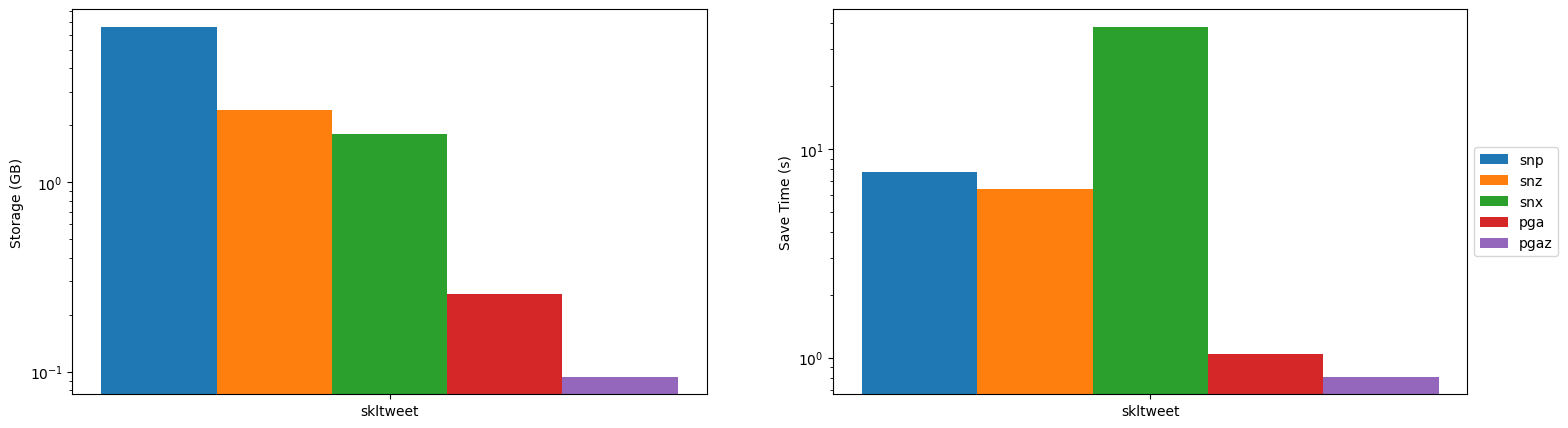

In [15]:
exp_i_df_plot(exp_i_df[exp_i_df["nb"] == "skltweet"], ["snp", "snz", "snx", "pga", "pgaz"])

In [16]:
exp_i_df.to_csv("plots/exp_i.txt", index_label="index", sep=" ", na_rep='nan')

In [17]:
exp_i_df[exp_i_df["nb"] == "skltweet"].to_csv("plots/exp_i_skltweet.txt", index_label="index", sep=" ", na_rep='nan')

### Intro: Bottlenecks

In [18]:
def parse_result_per_exec(nb_path, sut):
    result = read_result(nb_path)
    dumps = result["dumps"][1:] if sut == "pga" else result["dumps"][:-1]
    vec_loads = [[] for _ in range(len(dumps))]
    for load in result["loads"]:
        vec_loads[load["tid"]].append(load["time_s"])
    return {
        "storage_gb": [dump["storage_b"] / 1e9 for dump in dumps],
        "exec_s": result["exec_times"],
        "sync_save_s": [dump["time_s"] for dump in dumps],
        "load_s": [np.mean(vec_load) for vec_load in vec_loads],
    }

def parse_nb_per_exec(nb_paths, suts):
    results = {}
    for sut in suts:
        nb_path = nb_paths[sut]
        try:
            result = parse_result_per_exec(nb_path, sut)
        except FileNotFoundError:
            print(f"WARNING: Missing {nb_path}")
            continue
        for k, v in result.items():
            results[f"{sut}_{k}"] = v
    return results

def parse_nbs_per_exec(all_nb_paths, nbs, suts):
    return {
        nb: pd.DataFrame(parse_nb_per_exec(all_nb_paths[nb], suts)) for nb in nbs
    }

suts = ["snp", "pga"]
nbs = ["ai4code", "ecomsmph"]
dfs_by_nb = parse_nbs_per_exec(all_nb_paths, nbs=nbs, suts=suts)
for nb, df in dfs_by_nb.items():
    df[f"exec_s"] = df[f"snp_exec_s"]
    df[f"cexec_s"] = np.cumsum(df[f"snp_exec_s"])
    for sut in suts:
        df[f"{sut}_save_s"] = df[f"{sut}_sync_save_s"] + np.clip(df[f"{sut}_exec_s"] - df[f"snp_exec_s"], 0, None)
        df[f"{sut}_total_s"] = df[f"{sut}_sync_save_s"] + df[f"{sut}_exec_s"]
        # df[f"{sut}_rel_save_s"] = (df[f"{sut}_sync_save_s"] + np.clip(df[f"{sut}_exec_s"] - df[f"snp_exec_s"], 0, None)) / df[f"{sut}_exec_s"]
    df["nb"] = nb
    df["cell"] = range(df.shape[0])
for nb, df in dfs_by_nb.items():
    for sut in suts:
        df.drop([f"{sut}_sync_save_s", f"{sut}_exec_s"], axis=1, inplace=True)
    print(nb)
    display(df)

ai4code


,snp_storage_gb,snp_load_s,pga_storage_gb,pga_load_s,exec_s,cexec_s,snp_save_s,snp_total_s,pga_save_s,pga_total_s,nb,cell
0,3.350000e-07,0.000987,0.000002,0.002174,0.153135,0.153135,0.000654,0.153790,0.006996,0.160131,ai4code,0
1,1.974472e+00,43.236721,1.972184,51.127600,47.306201,47.459337,80.595585,127.901786,114.685540,161.991741,ai4code,1
2,3.948945e+00,45.534683,1.972184,0.001581,0.027127,47.486464,80.641249,80.668376,0.009581,0.036708,ai4code,2
3,5.923417e+00,43.582772,1.972185,36.388975,0.000671,47.487134,80.508589,80.509260,0.000817,0.001488,ai4code,3
4,7.993486e+00,55.629074,2.086950,51.157319,1.027763,48.514897,101.891664,102.919427,139.644716,140.672479,ai4code,4
5,1.006356e+01,55.919933,2.086951,46.054824,0.000921,48.515818,102.379854,102.380775,0.001551,0.002371,ai4code,5
6,1.216726e+01,55.707202,3.425606,28.844498,60.289751,108.805569,101.872240,162.161990,16.140039,76.429790,ai4code,6
7,1.429731e+01,56.459870,3.451949,0.051664,0.145543,108.951112,102.193451,102.338994,61.883498,62.029041,ai4code,7
8,1.640409e+01,56.029065,4.758614,28.507318,0.853197,109.804309,102.058784,102.911982,62.696907,63.550104,ai4code,8
9,1.851087e+01,56.107735,4.758615,41.645812,0.000924,109.805233,101.797752,101.798676,0.001069,0.001892,ai4code,9


ecomsmph


,snp_storage_gb,snp_load_s,pga_storage_gb,pga_load_s,exec_s,cexec_s,snp_save_s,snp_total_s,pga_save_s,pga_total_s,nb,cell
0,3.040000e-07,0.000631,0.000002,0.002447,0.198028,0.198028,0.000623,0.198650,0.001311,0.197300,ecomsmph,0
1,2.902244e+00,171.373954,2.902300,214.179416,50.243505,50.441532,275.611241,325.854746,0.000745,43.172069,ecomsmph,1
2,1.040623e+01,449.799796,7.504127,336.361439,69.939707,120.381239,727.028505,796.968213,452.645270,522.584977,ecomsmph,2
3,2.132043e+01,607.026534,10.914483,600.000859,9.714438,130.095677,1063.983900,1073.698338,725.752050,735.466488,ecomsmph,3
4,3.223694e+01,608.746542,10.928483,1.370522,0.737147,130.832824,1067.019104,1067.756251,1932.608168,1933.345315,ecomsmph,4
5,4.315344e+01,607.046649,10.928483,600.000895,5.247352,136.080176,1066.872922,1072.120274,0.082391,5.329743,ecomsmph,5
6,5.406992e+01,607.043018,10.944293,1.330004,0.080020,136.160196,1072.584899,1072.664919,0.075622,0.155642,ecomsmph,6
7,6.498640e+01,607.201348,10.944299,1.373711,0.011909,136.172104,1070.416082,1070.427991,3.157651,3.169559,ecomsmph,7
8,7.590289e+01,607.111799,10.948211,1.422040,0.067701,136.239805,1072.646394,1072.714095,3.013300,3.081002,ecomsmph,8
9,8.682328e+01,606.979114,10.952355,2.586745,2.400681,138.640487,1075.289971,1077.690653,3.208318,5.608999,ecomsmph,9


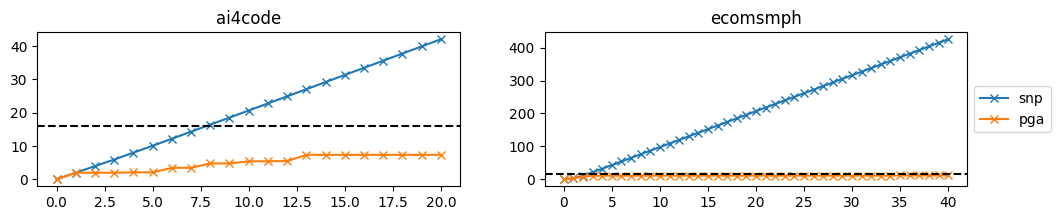

In [19]:
N = len(dfs_by_nb)
fig, axs = plt.subplots(ncols=N, figsize=(N * 6, 2))
for ax, (nb, df) in zip(axs, dfs_by_nb.items()):
    for sut in suts:
        ax.plot(df["cell"], df[f"{sut}_storage_gb"], "-x", label=sut)
    ax.axhline(16, linestyle="dashed", color="#030303")
    # ax.set_yscale("log")
    ax.set_title(nb)
axs[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

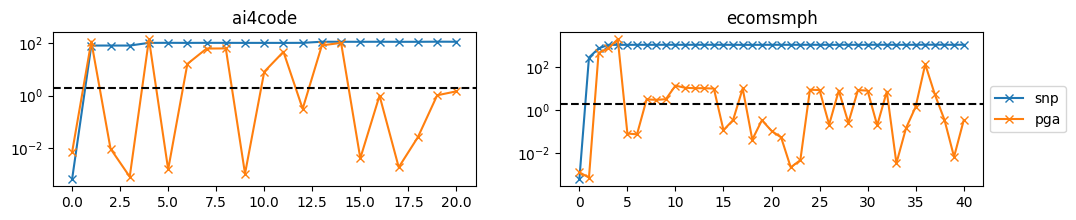

In [20]:
N = len(dfs_by_nb)
fig, axs = plt.subplots(ncols=N, figsize=(N * 6, 2))
for ax, (nb, df) in zip(axs, dfs_by_nb.items()):
    # ax.plot(df["cell"], df[f"exec_s"], "-x", label="noop")
    for sut in suts:
        # ax.plot(df["cell"], df[f"{sut}_total_s"], "-x", label=sut)
        ax.plot(df["cell"], df[f"{sut}_save_s"], "-x", label=sut)
    ax.axhline(2, linestyle="dashed", color="#030303")
    ax.set_yscale("log")
    ax.set_title(nb)
axs[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

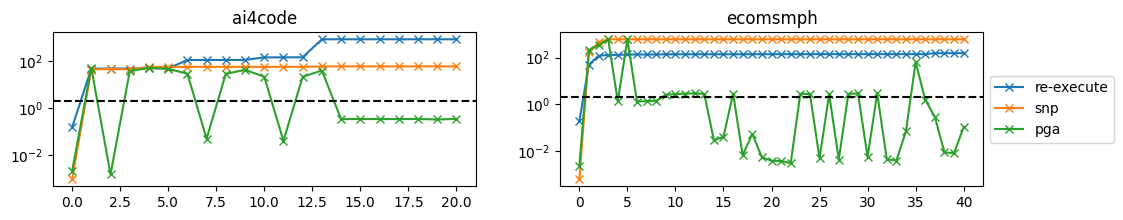

In [21]:
N = len(dfs_by_nb)
fig, axs = plt.subplots(ncols=N, figsize=(N * 6, 2))
for ax, (nb, df) in zip(axs, dfs_by_nb.items()):
    ax.plot(df["cell"], df[f"cexec_s"], "-x", label="re-execute")
    for sut in suts:
        ax.plot(df["cell"], df[f"{sut}_load_s"], "-x", label=sut)
    ax.axhline(2, linestyle="dashed", color="#030303")
    ax.set_yscale("log")
    ax.set_title(nb)
axs[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
nbssimple = {
    # 'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    # 'tpsmay22': 'tpsmay',
    # 'twittnet': 'twittnet',
    'ai4code': 'aicode',
    'agripred': 'agripred',
    'msciedaw': 'msciedaw',
    'ecomsmph': 'ecomsmph',
}
with open("plots/exp_i_percell.tex", "w") as f:
    for nb, df in dfs_by_nb.items():
        print(nb)
        print(np.sum(df["pga_save_s"] < 23.0), np.sum(df["pga_load_s"] < 23.0))
        print(np.sum(df["pga_save_s"]), np.percentile(df["pga_save_s"], 90), np.mean(df["pga_load_s"]), np.percentile(df["pga_load_s"], 90))
        display(df)
        f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
        f.write(df.to_csv(index_label="index", sep=" ", na_rep="nan"))
        f.write("}" + f"\\tableexpipercell{nbssimple[nb]}\n")

ai4code
14 13
637.5940084457397 101.78269743919373 17.533238831020537 46.054823875427246


,snp_storage_gb,snp_load_s,pga_storage_gb,pga_load_s,exec_s,cexec_s,snp_save_s,snp_total_s,pga_save_s,pga_total_s,nb,cell
0,3.350000e-07,0.000987,0.000002,0.002174,0.153135,0.153135,0.000654,0.153790,0.006996,0.160131,ai4code,0
1,1.974472e+00,43.236721,1.972184,51.127600,47.306201,47.459337,80.595585,127.901786,114.685540,161.991741,ai4code,1
2,3.948945e+00,45.534683,1.972184,0.001581,0.027127,47.486464,80.641249,80.668376,0.009581,0.036708,ai4code,2
3,5.923417e+00,43.582772,1.972185,36.388975,0.000671,47.487134,80.508589,80.509260,0.000817,0.001488,ai4code,3
4,7.993486e+00,55.629074,2.086950,51.157319,1.027763,48.514897,101.891664,102.919427,139.644716,140.672479,ai4code,4
5,1.006356e+01,55.919933,2.086951,46.054824,0.000921,48.515818,102.379854,102.380775,0.001551,0.002371,ai4code,5
6,1.216726e+01,55.707202,3.425606,28.844498,60.289751,108.805569,101.872240,162.161990,16.140039,76.429790,ai4code,6
7,1.429731e+01,56.459870,3.451949,0.051664,0.145543,108.951112,102.193451,102.338994,61.883498,62.029041,ai4code,7
8,1.640409e+01,56.029065,4.758614,28.507318,0.853197,109.804309,102.058784,102.911982,62.696907,63.550104,ai4code,8
9,1.851087e+01,56.107735,4.758615,41.645812,0.000924,109.805233,101.797752,101.798676,0.001069,0.001892,ai4code,9


ecomsmph
37 36
3379.261204481125 13.699182033538818 45.282601943830166 64.298095703125


,snp_storage_gb,snp_load_s,pga_storage_gb,pga_load_s,exec_s,cexec_s,snp_save_s,snp_total_s,pga_save_s,pga_total_s,nb,cell
0,3.040000e-07,0.000631,0.000002,0.002447,0.198028,0.198028,0.000623,0.198650,0.001311,0.197300,ecomsmph,0
1,2.902244e+00,171.373954,2.902300,214.179416,50.243505,50.441532,275.611241,325.854746,0.000745,43.172069,ecomsmph,1
2,1.040623e+01,449.799796,7.504127,336.361439,69.939707,120.381239,727.028505,796.968213,452.645270,522.584977,ecomsmph,2
3,2.132043e+01,607.026534,10.914483,600.000859,9.714438,130.095677,1063.983900,1073.698338,725.752050,735.466488,ecomsmph,3
4,3.223694e+01,608.746542,10.928483,1.370522,0.737147,130.832824,1067.019104,1067.756251,1932.608168,1933.345315,ecomsmph,4
5,4.315344e+01,607.046649,10.928483,600.000895,5.247352,136.080176,1066.872922,1072.120274,0.082391,5.329743,ecomsmph,5
6,5.406992e+01,607.043018,10.944293,1.330004,0.080020,136.160196,1072.584899,1072.664919,0.075622,0.155642,ecomsmph,6
7,6.498640e+01,607.201348,10.944299,1.373711,0.011909,136.172104,1070.416082,1070.427991,3.157651,3.169559,ecomsmph,7
8,7.590289e+01,607.111799,10.948211,1.422040,0.067701,136.239805,1072.646394,1072.714095,3.013300,3.081002,ecomsmph,8
9,8.682328e+01,606.979114,10.952355,2.586745,2.400681,138.640487,1075.289971,1077.690653,3.208318,5.608999,ecomsmph,9


## 3. Partial Loads

In [23]:
suts = [
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pga",
]
# nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
nbs = ['skltweet', 'ai4code', 'agripred', 'msciedaw', 'ecomsmph']
rows = []
for nb in nbs:
    for sut in suts:
        if sut not in all_nb_paths[nb]:
            continue
        result = read_result(all_nb_paths[nb][sut])
        for load in result["loads"]:
            rows.append({
                "nb": nb,
                "sut": sut,
                "tid": load["tid"],
                "time_s": load["time_s"],
            })
pload_df = pd.DataFrame(rows)
pload_df

,nb,sut,tid,time_s
0,skltweet,dill,36,4.576421
1,skltweet,dill,8,3.093267
2,skltweet,dill,20,3.259718
3,skltweet,dill,9,3.148291
4,skltweet,dill,38,4.567801
...,...,...,...,...
1650,ecomsmph,pga,39,0.008274
1651,ecomsmph,pga,26,2.684928
1652,ecomsmph,pga,5,600.000895
1653,ecomsmph,pga,17,0.006747


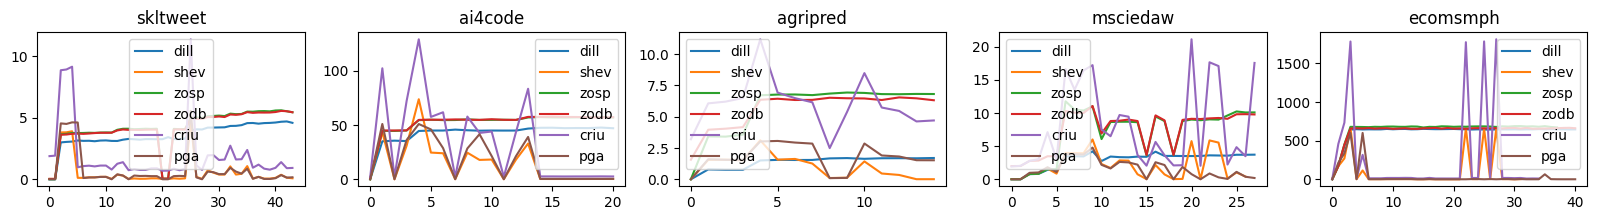

In [24]:
fig, axs = plt.subplots(ncols=5, figsize=(4*5, 2))
result_by_nb = {}
for idx, nb in enumerate(nbs):
    result = pload_df[pload_df["nb"] == nb]
    result = result.groupby(['sut', 'tid'])['time_s'].median().reset_index()
    result = result.pivot_table(index='tid', columns='sut', values='time_s', aggfunc='first').add_suffix('_median_load_s').reset_index()
    result_by_nb[nb] = result
    for sut in suts:
        if f"{sut}_median_load_s" in result:
            axs[idx].plot(result.tid, result[f"{sut}_median_load_s"], label=sut)
    axs[idx].legend()
    axs[idx].set_title(nb)
plt.show()

In [25]:
nbssimple = {
    # 'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    # 'tpsmay22': 'tpsmay',
    # 'twittnet': 'twittnet',
    'ai4code': 'aicode',
    'agripred': 'agripred',
    'msciedaw': 'msciedaw',
    'ecomsmph': 'ecomsmph',
}
with open("plots/exp_i_ploads.tex", "w") as f:
    for nb in nbs:
        print(nb)
        display(result_by_nb[nb])
        f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
        f.write(result_by_nb[nb].to_csv(index_label="index", sep=" ", na_rep="nan"))
        f.write("}" + f"\\tableexpipload{nbssimple[nb]}\n")

skltweet


sut,tid,criu_median_load_s,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,1.881822,0.000554,0.001529,0.031494,0.030133,0.001379
1,1,1.921798,0.000576,0.000971,0.031117,0.030177,0.001429
2,2,8.864210,2.997584,4.543019,3.808641,3.622343,3.659999
3,3,8.926539,3.038578,4.500297,3.818572,3.639499,3.691025
4,4,9.150939,3.065529,4.626584,3.903646,3.697869,3.768830
5,5,0.975249,3.153893,4.616508,0.116674,3.710590,3.757831
6,6,1.071216,3.123123,0.103165,0.117167,3.692350,3.765600
7,7,1.106817,3.130960,0.148768,0.157389,3.721179,3.783666
8,8,1.047773,3.093267,0.151192,0.158729,3.757539,3.772442
9,9,1.115218,3.148291,0.192964,0.198419,3.782401,3.796501


ai4code


sut,tid,criu_median_load_s,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,1.939519,0.000624,0.002226,0.012523,0.840623,0.002030
1,1,102.411087,35.038967,51.043780,43.584301,44.970393,44.696444
2,2,2.000876,35.644914,0.001592,0.011814,45.015513,44.627325
3,3,72.307659,35.249368,36.291888,30.961754,45.084976,45.030279
4,4,129.189317,44.578389,50.975182,73.862638,54.802521,54.559737
5,5,57.554094,44.985221,46.032209,24.631694,54.967261,54.942186
6,6,61.837163,44.971741,28.765637,24.011864,54.960904,54.605020
7,7,2.205614,45.840684,0.052305,0.088935,55.232834,54.679623
8,8,57.858555,45.232491,28.447759,24.532017,54.967109,55.268124
9,9,42.772522,44.841627,41.600051,17.868030,54.827756,54.749403


agripred


sut,tid,criu_median_load_s,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,3.197480,0.000787,0.001713,0.006350,1.563301,0.002522
1,1,6.064089,0.788457,1.601494,1.552990,3.957691,3.426721
2,2,6.203167,0.758880,1.554413,1.566929,4.041912,3.407230
3,3,6.492920,0.759984,1.554618,1.516773,4.166852,3.566708
4,4,11.182701,1.504507,3.022530,3.115241,6.350941,6.709990
5,5,6.924328,1.551096,3.063003,1.566318,6.433945,6.767306
6,6,6.481213,1.540806,2.933523,1.625666,6.332333,6.773514
7,7,6.148645,1.544927,2.849357,1.256396,6.343887,6.723032
8,8,2.490387,1.669254,0.092475,0.101076,6.511791,6.845373
9,9,5.379019,1.694076,0.111363,0.126595,6.471327,6.929199


msciedaw


sut,tid,criu_median_load_s,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,1.931297,0.000958,0.002780,0.024735,1.996748,0.002985
1,1,2.028596,0.000786,0.000967,0.024090,2.004481,0.002335
2,2,2.773175,0.772947,0.975424,0.793558,2.772866,0.793158
3,3,3.043618,0.815212,1.032024,0.884927,2.829417,0.845791
4,4,7.114777,1.427099,1.818017,1.609224,3.478490,1.523336
5,5,2.966757,1.461588,1.097811,0.853341,3.473618,1.489607
6,6,16.644643,3.460337,3.755154,3.978909,10.313088,11.775361
7,7,13.521126,3.482276,3.802662,3.943317,10.060295,10.523507
8,8,16.437449,3.451205,3.733255,3.929379,10.010752,10.382175
9,9,17.231325,4.221486,4.786236,6.012887,11.062383,11.018105


ecomsmph


sut,tid,criu_median_load_s,dill_median_load_s,pga_median_load_s,shev_median_load_s,zodb_median_load_s,zosp_median_load_s
0,0,1.802419,0.000574,0.002447,0.025461,3.611392,0.021886
1,1,457.598130,167.798784,214.179416,168.734549,174.165184,176.129394
2,2,733.979223,432.071273,336.361439,270.096558,447.755973,451.899127
3,3,1784.299592,643.020516,600.000859,666.537485,657.349505,679.147460
4,4,12.656127,648.667783,1.370522,1.115053,660.483506,678.066297
5,5,316.275415,645.160211,600.000895,114.074954,657.645852,677.105167
6,6,12.459977,646.754626,1.330004,1.110754,663.125957,675.000403
7,7,12.675613,646.244199,1.373711,1.134285,656.039770,679.589759
8,8,12.644607,646.327426,1.422040,1.106144,659.755919,678.015934
9,9,17.101532,652.213996,2.586745,2.058498,661.062733,682.356143


In [26]:
!cat plots/exp_i_ploads.tex

\pgfplotstableread[header=has colnames]{
index tid criu_median_load_s dill_median_load_s pga_median_load_s shev_median_load_s zodb_median_load_s zosp_median_load_s
0 0 1.881821870803833 0.0005543231964111328 0.0015287399291992188 0.03149402141571045 0.03013312816619873 0.0013794898986816406
1 1 1.921797513961792 0.0005755424499511719 0.0009714365005493164 0.03111732006072998 0.030176997184753418 0.0014289617538452148
2 2 8.864209651947021 2.997584342956543 4.543018817901611 3.808641195297241 3.6223431825637817 3.6599985361099243
3 3 8.926539421081543 3.0385777950286865 4.500296592712402 3.8185718059539795 3.639498710632324 3.691025137901306
4 4 9.150938510894775 3.0655293464660645 4.626583576202393 3.903646230697632 3.697868585586548 3.7688299417495728
5 5 0.9752490520477295 3.153893232345581 4.61650824546814 0.11667418479919434 3.710590124130249 3.7578314542770386
6 6 1.071216106414795 3.1231234073638916 0.10316526889801025 0.11716711521148682 3.692350387573242 3.765600085258484
7 7 1

## 2. Ablation Studies

### CD, AVF, Async, ASCC

In [27]:
# nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
# # nbs = ['skltweet', 'ai4code', 'agripred', 'msciedaw', 'ecomsmph']

# def extract_less(suts, baselines=BASELINES):
#     nb_paths = {nb: {sut: all_nb_paths[nb][sut] for sut in suts if sut in all_nb_paths[nb]} for nb in all_nb_paths}
#     all_results = parse_all_nbs(nb_paths, baselines=baselines)
#     return pd.DataFrame([{
#         "nb": nb,
#         **all_results[nb],
#     } for nb in nbs])

# exp_ii_df = extract_less(["pgcache0noavf", "pgnoavf", "pgcache0", "pga"], baselines=["pgcache0noavf"])
# display(exp_ii_df)
# exp_iv_df = extract_less(["pgnoavlstatic", "pgnostatic", "pgnoavl", "pga"], baselines=["pgnoavlstatic"])
# display(exp_iv_df)

In [28]:
# exp_ii_df.to_csv("plots/exp_ii.txt", index_label="index", sep=" ", na_rep='nan')
# exp_iv_df.to_csv("plots/exp_iv.txt", index_label="index", sep=" ", na_rep='nan')

In [29]:
# !cat plots/exp_ii.txt

In [30]:
# !cat plots/exp_iv.txt

### Cache Plots

,cache_size,skltweet_storage_gb,skltweet_sum_save_s,ai4code_storage_gb,ai4code_sum_save_s,agripred_storage_gb,agripred_sum_save_s,msciedaw_storage_gb,msciedaw_sum_save_s,ecomsmph_storage_gb,ecomsmph_sum_save_s
0,0.002,1.240965,37.250221,10.351281,445.276895,45.232776,36.416582,63.443510,96.468386,19.697100,3357.560245
1,0.004,1.240964,37.836451,10.351276,446.882054,45.232776,35.274825,63.443504,102.835912,19.697105,3402.460758
2,0.016,1.240964,45.084998,10.351271,452.013562,45.232776,38.192950,63.443518,102.674941,19.697116,3449.951896
3,0.064,1.240964,36.799257,10.351257,441.053694,45.232776,36.496367,63.443532,109.822911,19.697113,3399.358477
4,0.256,1.175113,36.243626,8.579050,448.857121,45.232776,37.807210,63.443520,93.561918,19.357521,3408.750844
5,1.024,1.017567,36.731363,8.300383,445.244430,10.058725,8.220980,63.423766,102.266556,11.916941,3420.364314
6,4.096,0.282607,34.910829,7.342884,448.928591,10.057763,12.412045,63.407703,89.533090,11.584848,3363.048893
7,16.384,0.255496,35.671719,7.338318,456.043152,10.056296,8.966467,12.172822,62.761632,11.543247,3413.007438
8,65.536,0.260106,34.784344,7.338282,453.268422,10.057763,6.598423,11.556783,71.474900,11.555868,3433.909912
9,262.144,0.257117,34.644636,7.338304,453.984605,10.056296,6.111230,11.562375,63.805950,11.554432,3428.921716


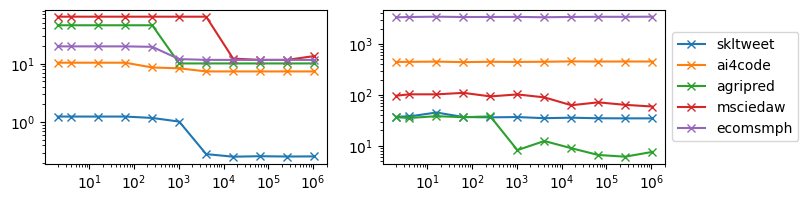

In [31]:
cache_map = [
    ("pgcache0", 2),  # HACK
    ("pgcache4", 4),
    ("pgcache16", 16),
    ("pgcache64", 64),
    ("pgcache256", 256),
    ("pgcache1024", 1024),
    ("pgcache4096", 4096),
    ("pgcache16384", 16384),
    ("pgcache65536", 65536),
    ("pgcache262144", 262144),
    ("pgcache1048576", 1048576),
]
cache_lines = {"cache_size": [cache_size / 1e3 for _, cache_size in cache_map]}
# cache_map = [
#     ("pgcache0", 0.5e6),  # HACK
#     ("pgcache1m", 1e6),
#     ("pgcache15m", 15.625e6),
#     ("pgcache31m", 31.25e6),
#     ("pgcache62m", 62.5e6),
#     ("pgcache125m", 125e6),
#     ("pgcache250m", 250e6),
#     ("pgcache500m", 500e6),
#     ("pgcache1g", 1e9),
#     ("pgcache2g", 2e9),
#     ("pgcache4g", 4e9),
#     ("pgcache8g", 8e9),
#     # ("pgcache10g", 10e9),
#     ("pgcache16g", 16e9),
#     ("pgcache100g", 100e9),
# ]
# cache_lines = {"cache_size": [cache_size / 1e9 for _, cache_size in cache_map]}
fig, axs = plt.subplots(ncols=2, figsize=(8, 2))
for idx in range(len(exp_i_df.nb)):
    nb = exp_i_df.nb[idx]
    xs, ystores, ysaves = [], [], []
    for name, cache_size in cache_map:
        xs.append(cache_size)
        ystores.append(exp_i_df[f"{name}_storage_gb"][idx])
        ysaves.append(exp_i_df[f"{name}_sum_save_s"][idx])
    cache_lines[f"{nb}_storage_gb"] = ystores
    cache_lines[f"{nb}_sum_save_s"] = ysaves
    axs[0].plot(xs, ystores, marker="x", label=nb)
    axs[1].plot(xs, ysaves, marker="x", label=nb)
cache_df = pd.DataFrame(cache_lines)
display(cache_df)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [32]:
cache_df.to_csv("plots/exp_ii_cache.txt", index_label="index", sep=" ")

In [33]:
!cat "plots/exp_ii_cache.txt"

index cache_size skltweet_storage_gb skltweet_sum_save_s ai4code_storage_gb ai4code_sum_save_s agripred_storage_gb agripred_sum_save_s msciedaw_storage_gb msciedaw_sum_save_s ecomsmph_storage_gb ecomsmph_sum_save_s
0 0.002 1.240964866 37.25022053718567 10.351281402 445.2768952846527 45.232776292 36.416581869125366 63.443509706 96.46838569641113 19.697100141 3357.5602452754974
1 0.004 1.240964115 37.836451292037964 10.351275716 446.8820538520813 45.232776292 35.27482485771179 63.44350403 102.83591151237488 19.697104832 3402.4607582092285
2 0.016 1.240963746 45.08499813079834 10.351270767 452.01356172561646 45.232776292 38.19295024871826 63.443518261 102.67494130134583 19.697115711 3449.9518959522247
3 0.064 1.240963722 36.79925727844238 10.351256896 441.05369424819946 45.232776291 36.49636745452881 63.443531908 109.82291078567505 19.697113387 3399.3584773540497
4 0.256 1.175113022 36.24362564086914 8.579049755 448.8571209907532 45.232776192 37.807209730148315 63.443520421 93.56191778182

## 4. Wait vs. Perceived Delay Time

In [34]:
suts = [
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pglnoavlstatic",
    "pgnoavlstatic",
    "pgnostatic",
    # "pgl",
    "pgnoavl",
    "pga",
]
# nbs = ['betterxb', 'skltweet', 'tpsmay22', 'twittnet', 'ai4code']
nbs = ['skltweet', 'ai4code', 'agripred', 'msciedaw', 'ecomsmph']
nbs.extend(['skltweetexc', 'ai4codeexc', 'agripredexc', 'msciedawexc', 'ecomsmphexc'])
nbs.append('twittnet')
# suts = [
#     "pgnoavl",
#     "pga",
# ]
# nbs = ['twittnet']
rows = []

for nb in nbs:
    baseline_result = read_result(all_nb_paths[nb]["snp"])  # Pure exec time without locking.
    baseline_exec_times = baseline_result["exec_times"]
    for sut in suts:
        if sut not in all_nb_paths[nb]:
            continue
        result = read_result(all_nb_paths[nb][sut])
        assert len(result["exec_times"]) <= len(baseline_exec_times), f"{nb=}, {sut=}, {len(result['exec_times'])} != {len(baseline_exec_times)}"
        for idx in range(len(result["exec_times"])):
            dump_time = result["dumps"][idx]["time_s"]
            join_time = 0 if idx >= len(result["join_times"]) else result["join_times"][idx]
            prev_join_time = 0 if idx <= 0 or idx > len(result["join_times"]) else result["join_times"][idx - 1]  # Shifted
            async_time = 0 if idx >= len(result["async_dumps"]) else result["async_dumps"][idx]["time_s"]
            lock_time = 0 if idx >= len(result["exec_times"]) - 1 else max(result["exec_times"][idx + 1] - baseline_exec_times[idx + 1], 0)
            # lock_time = 0 if idx >= len(result["lock_times"]) else result["lock_times"][idx]  # This is not aligned.
            # print(nb, sut, idx, dump_time - prev_join_time + join_time + lock_time, dump_time - prev_join_time, join_time, lock_time)
            rows.append({
                "nb": nb,
                "sut": sut,
                "sync_time": dump_time - prev_join_time,
                "async_time": async_time,
                "lock_time": lock_time,
                "join_time": join_time,
                "dump_time": dump_time,
            })
async_df = pd.DataFrame(rows)
async_df

,nb,sut,sync_time,async_time,lock_time,join_time,dump_time
0,skltweet,dill,0.000565,0.000000,0.000007,0.000000,0.000565
1,skltweet,dill,0.000303,0.000000,0.000000,0.000000,0.000303
2,skltweet,dill,5.108533,0.000000,0.008262,0.000000,5.108533
3,skltweet,dill,5.144294,0.000000,0.000000,0.000000,5.144294
4,skltweet,dill,5.251940,0.000000,0.000000,0.000000,5.251940
...,...,...,...,...,...,...,...
2519,twittnet,pga,0.000603,0.003298,0.007203,0.000034,25.355134
2520,twittnet,pga,0.000476,0.091455,0.002272,0.004909,0.000510
2521,twittnet,pga,0.000487,15.721861,0.176049,14.524387,0.005396
2522,twittnet,pga,0.000763,29.774255,11.102983,0.167281,14.525150


In [35]:
save_s_final = 600
delay_df_by_nbsut = {}
for nb in nbs:
    df = async_df[async_df["nb"] == nb]
    delay_df_by_nbsut[nb] = {}
    for sut in suts:
        sut_df = df[df["sut"] == sut]
        sut_baseline = df[df["sut"] == "pga"]
        save_times = (
            np.array(sut_df["sync_time"])
            + np.array(sut_df["lock_time"])
            + np.array(sut_df["join_time"])
        )
        if len(save_times) == 0:
            continue
        if sut == "pga":
            time_threshold = 23.0
            print(nb, sut, np.sum(save_times <= time_threshold), np.sum(save_times > time_threshold), len(save_times), np.mean(save_times))
        delay_rows = [{"save_s": ts, "ecdf": ecdf * 100} for ts, ecdf in zip(np.sort(save_times), 1.0 / len(save_times) + np.linspace(0, 1, len(save_times), endpoint=False))]
        # delay_rows.append({"save_s": save_s_final, "ecdf": 100})
        delay_df_by_nbsut[nb][sut] = pd.DataFrame(delay_rows)

skltweet pga 44 0 44 1.4966935027729382
ai4code pga 14 7 21 30.361441759836104
agripred pga 15 0 15 0.6206908861796061
msciedaw pga 28 0 28 2.369669360773904
ecomsmph pga 37 4 41 82.42102556693845
skltweetexc pga 44 0 44 0.6336316032843157
ai4codeexc pga 16 5 21 14.817834706533523
agripredexc pga 15 0 15 0.2504162311553955
msciedawexc pga 28 0 28 1.1342399546078272
ecomsmphexc pga 39 2 41 23.50770332755112
twittnet pga 16 1 17 3.6443871329812443


In [36]:
nbssimple = {
    # 'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    # 'tpsmay22': 'tpsmay',
    'twittnet': 'twittnet',
    'ai4code': 'aicode',
    'agripred': 'agripred',
    'msciedaw': 'msciedaw',
    'ecomsmph': 'ecomsmph',
    # 'betterxbexc': 'betterxbexc',
    'skltweetexc': 'skltweetexc',
    # 'tpsmay22exc': 'tpsmayexc',
    'twittnetexc': 'twittnetexc',
    'ai4codeexc': 'aicodeexc',
    'agripredexc': 'agripredexc',
    'msciedawexc': 'msciedawexc',
    'ecomsmphexc': 'ecomsmphexc',
}
with open("plots/exp_iv_ecdf.tex", "w") as f:
    for nb in nbs:
        for sut in suts:
            if sut not in delay_df_by_nbsut[nb]:
                continue
            print(nb, sut, max(delay_df_by_nbsut[nb][sut]["save_s"]))
            # display(delay_df_by_nbsut[nb][sut])
            f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
            f.write(delay_df_by_nbsut[nb][sut].to_csv(index_label="index", sep=" "))
            f.write("}" + f"\\tableexpivecdf{nbssimple[nb]}{sut}\n")

skltweet dill 8.283949375152588
skltweet shev 22.399598121643066
skltweet zosp 12.229471445083618
skltweet zodb 12.131491899490356
skltweet criu 11.598659038543701
skltweet pglnoavlstatic 10.814435243606567
skltweet pgnoavlstatic 10.118992805480957
skltweet pgnostatic 9.846075057983398
skltweet pgnoavl 10.010596990585327
skltweet pga 14.335347652435303
ai4code dill 108.62999534606934
ai4code shev 292.5877182483673
ai4code zosp 135.31158447265625
ai4code zodb 131.2558033466339
ai4code criu 100.86652255058289
ai4code pglnoavlstatic 126.2413284778595
ai4code pgnoavlstatic 126.5673463344574
ai4code pgnostatic 120.85679054260254
ai4code pgnoavl 124.24488282203674
ai4code pga 139.61113500595093
agripred dill 3.5709102153778076
agripred shev 12.556562185287476
agripred zosp 52.91726040840149
agripred zodb 46.40567064285278
agripred criu 14.30969786643982
agripred pglnoavlstatic 3.0976173877716064
agripred pgnoavlstatic 1.9173059463500977
agripred pgnostatic 1.9793567657470703
agripred pgnoavl

In [37]:
!cat plots/exp_iv_ecdf.tex

\pgfplotstableread[header=has colnames]{
index save_s ecdf
0 0.00030303001403808594 2.272727272727273
1 0.0005724430084228516 4.545454545454546
2 5.116794586181641 6.8181818181818175
3 5.144293546676636 9.090909090909092
4 5.175947666168213 11.363636363636365
5 5.207578420639038 13.636363636363638
6 5.238260507583618 15.909090909090908
7 5.251939535140991 18.181818181818183
8 5.265272617340088 20.454545454545457
9 5.3060266971588135 22.72727272727273
10 5.321648359298706 25.0
11 5.339178085327148 27.27272727272727
12 5.342483282089233 29.54545454545454
13 5.418497562408447 31.818181818181817
14 5.418567180633545 34.090909090909086
15 5.42546820640564 36.36363636363637
16 5.425640344619751 38.63636363636363
17 5.426187038421631 40.90909090909091
18 5.4284751415252686 43.18181818181818
19 5.430150508880615 45.45454545454545
20 5.435827255249023 47.72727272727273
21 5.436795949935913 50.0
22 5.46477746963501 52.27272727272727
23 5.475206613540649 54.54545454545454
24 5.561097145080566 56.

In [38]:
# wait_ts = sorted(set(async_df["async_time"]))
delay_df_by_nb = {}
for nb in nbs:
    df = async_df[async_df["nb"] == nb]
    wait_ts = sorted(set(df["async_time"]))
    delay_rows = []
    for wait_t in wait_ts:
        delay_by_sut = {"wait_s": wait_t}
        for sut in suts:
            sut_df = df[df["sut"] == sut]
            sync_times = sut_df["sync_time"]
            async_times = sut_df["async_time"]
            delay_async_time = np.clip(async_times - wait_t, 0, None)
            if len(sync_times) == 0:
                continue
            delay_by_sut[f"{sut}_avg_delay_s"] = (sync_times.sum() + delay_async_time.sum()) / len(sync_times)
        delay_rows.append(delay_by_sut)
    delay_df = pd.DataFrame(delay_rows)
    delay_df_by_nb[nb] = delay_df

In [39]:
nbssimple = {
    # 'betterxb': 'betterxb',
    'skltweet': 'skltweet',
    # 'tpsmay22': 'tpsmay',
    'twittnet': 'twittnet',
    'ai4code': 'aicode',
    'agripred': 'agripred',
    'msciedaw': 'msciedaw',
    'ecomsmph': 'ecomsmph',
    # 'betterxbexc': 'betterxbexc',
    'skltweetexc': 'skltweetexc',
    # 'tpsmay22exc': 'tpsmayexc',
    'twittnetexc': 'twittnetexc',
    'ai4codeexc': 'aicodeexc',
    'agripredexc': 'agripredexc',
    'msciedawexc': 'msciedawexc',
    'ecomsmphexc': 'ecomsmphexc',
}
with open("plots/exp_iv_waits.tex", "w") as f:
    for nb in nbs:
        print(nb)
        display(delay_df_by_nb[nb])
        f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
        f.write(delay_df_by_nb[nb].to_csv(index_label="index", sep=" "))
        f.write("}" + f"\\tableexpivwait{nbssimple[nb]}\n")

skltweet


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,1.277499,1.269276,1.016505,1.385231
1,0.002408,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,1.275091,1.266868,1.014097,1.382823
2,0.002774,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,1.274725,1.266503,1.013739,1.382457
3,0.002855,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,1.274646,1.266421,1.013660,1.382376
4,0.002855,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,1.274646,1.266421,1.013660,1.382375
...,...,...,...,...,...,...,...,...,...,...,...
172,9.990271,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,0.020682,0.015033,0.019163,0.074719
173,10.629866,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,0.006146,0.000497,0.004626,0.060183
174,10.813063,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,0.001982,0.000497,0.000463,0.056019
175,10.878064,6.122281,16.296566,9.117465,9.078055,8.782964,1.254093,0.000505,0.000497,0.000463,0.054542


ai4code


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,34.078231,32.076280,24.596642,28.322721
1,0.003246,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,34.074985,32.073035,24.593397,28.319475
2,0.003474,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,34.074768,32.072807,24.593169,28.319248
3,0.003795,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,34.074462,32.072485,24.592847,28.318941
4,0.003976,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,34.074289,32.072304,24.592675,28.318769
...,...,...,...,...,...,...,...,...,...,...,...
80,116.496296,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,0.604490,0.335284,0.495071,1.226881
81,123.524323,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,0.269822,0.000616,0.160403,0.892213
82,126.881867,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,0.109939,0.000616,0.000520,0.732330
83,129.178930,78.958886,241.561972,112.254431,112.356144,87.092163,32.891647,0.000555,0.000616,0.000520,0.622946


agripred


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,2.840412,2.854189,2.990392,2.741628
1,0.002654,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,2.837757,2.851535,2.987738,2.738974
2,0.003161,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,2.837251,2.851028,2.987265,2.738467
3,0.020729,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,2.819683,2.833460,2.970868,2.722071
4,0.023276,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,2.817136,2.830913,2.968661,2.719694
...,...,...,...,...,...,...,...,...,...,...,...
56,5.056096,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,0.001056,0.003633,0.144384,0.096258
57,5.095078,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,0.001056,0.001034,0.141785,0.091060
58,5.720082,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,0.001056,0.001034,0.100118,0.007727
59,5.828150,2.709697,8.185004,31.93687,29.398255,11.162057,2.059785,0.001056,0.001034,0.092914,0.000522


msciedaw


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,3.415411,3.810597,3.623327,3.334589
1,0.003361,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,3.412050,3.807236,3.619966,3.331228
2,0.004004,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,3.411406,3.806593,3.619346,3.330585
3,0.004019,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,3.411392,3.806578,3.619332,3.330571
4,0.004026,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,3.411385,3.806571,3.619325,3.330564
...,...,...,...,...,...,...,...,...,...,...,...
108,8.731325,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,0.010800,0.017544,0.013016,0.012418
109,8.984230,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,0.001768,0.008512,0.003984,0.003386
110,9.026309,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,0.001768,0.007009,0.002481,0.001883
111,9.033230,5.73854,18.316237,25.952289,22.143231,12.597178,3.583551,0.001768,0.006762,0.002234,0.001883


ecomsmph


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,94.615072,94.994454,88.441116,86.218216
1,0.003419,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,94.611653,94.991035,88.437697,86.214797
2,0.006142,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,94.608930,94.988312,88.434975,86.212141
3,0.006458,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,94.608614,94.988004,88.434659,86.211833
4,0.006658,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,94.608414,94.987808,88.434463,86.211637
...,...,...,...,...,...,...,...,...,...,...,...
160,799.074530,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,28.903451,28.734258,29.723288,28.198676
161,1955.001020,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,0.710122,0.540929,1.529959,0.005347
162,1976.991727,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,0.173763,0.004570,0.993600,0.005347
163,1983.847850,1037.491618,2395.008539,1296.910712,1893.569182,1094.921365,95.168763,0.006540,0.004570,0.826377,0.005347


skltweetexc


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pga_avg_delay_s
0,0.000000,1.186705,2.659915,1.589993,1.621426,3.537006,0.519421
1,0.003323,1.186705,2.659915,1.589993,1.621426,3.537006,0.516099
2,0.003439,1.186705,2.659915,1.589993,1.621426,3.537006,0.515985
3,0.003644,1.186705,2.659915,1.589993,1.621426,3.537006,0.515790
4,0.003835,1.186705,2.659915,1.589993,1.621426,3.537006,0.515611
5,0.003873,1.186705,2.659915,1.589993,1.621426,3.537006,0.515577
6,0.004383,1.186705,2.659915,1.589993,1.621426,3.537006,0.515125
7,0.005724,1.186705,2.659915,1.589993,1.621426,3.537006,0.513967
8,0.006464,1.186705,2.659915,1.589993,1.621426,3.537006,0.513344
9,0.007637,1.186705,2.659915,1.589993,1.621426,3.537006,0.512385


ai4codeexc


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pga_avg_delay_s
0,0.000000,41.146378,98.088114,51.910541,51.334338,48.548364,14.046079
1,0.003284,41.146378,98.088114,51.910541,51.334338,48.548364,14.042795
2,0.003649,41.146378,98.088114,51.910541,51.334338,48.548364,14.042447
3,0.003735,41.146378,98.088114,51.910541,51.334338,48.548364,14.042370
4,0.004972,41.146378,98.088114,51.910541,51.334338,48.548364,14.041310
5,0.008853,41.146378,98.088114,51.910541,51.334338,48.548364,14.038168
6,0.095860,41.146378,98.088114,51.910541,51.334338,48.548364,13.971877
7,0.102397,41.146378,98.088114,51.910541,51.334338,48.548364,13.967207
8,0.338490,41.146378,98.088114,51.910541,51.334338,48.548364,13.809812
9,0.340328,41.146378,98.088114,51.910541,51.334338,48.548364,13.808674


agripredexc


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pga_avg_delay_s
0,0.000000,1.157026,3.80867,15.753982,13.848957,6.414931,1.158612
1,0.002626,1.157026,3.80867,15.753982,13.848957,6.414931,1.155985
2,0.002668,1.157026,3.80867,15.753982,13.848957,6.414931,1.155946
3,0.004727,1.157026,3.80867,15.753982,13.848957,6.414931,1.154162
4,0.004926,1.157026,3.80867,15.753982,13.848957,6.414931,1.154003
5,0.044968,1.157026,3.80867,15.753982,13.848957,6.414931,1.124639
6,0.052737,1.157026,3.80867,15.753982,13.848957,6.414931,1.119459
7,0.085267,1.157026,3.80867,15.753982,13.848957,6.414931,1.099941
8,1.871378,1.157026,3.80867,15.753982,13.848957,6.414931,0.147349
9,1.874222,1.157026,3.80867,15.753982,13.848957,6.414931,0.146022


msciedawexc


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pga_avg_delay_s
0,0.000000,2.245965,6.649096,3.227097,2.871442,4.619493,1.041432
1,0.004211,2.245965,6.649096,3.227097,2.871442,4.619493,1.037221
2,0.004221,2.245965,6.649096,3.227097,2.871442,4.619493,1.037211
3,0.004335,2.245965,6.649096,3.227097,2.871442,4.619493,1.037105
4,0.004416,2.245965,6.649096,3.227097,2.871442,4.619493,1.037033
5,0.004601,2.245965,6.649096,3.227097,2.871442,4.619493,1.036874
6,0.008761,2.245965,6.649096,3.227097,2.871442,4.619493,1.033457
7,0.009737,2.245965,6.649096,3.227097,2.871442,4.619493,1.032690
8,0.033464,2.245965,6.649096,3.227097,2.871442,4.619493,1.014895
9,0.065399,2.245965,6.649096,3.227097,2.871442,4.619493,0.992084


ecomsmphexc


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pga_avg_delay_s
0,0.000000,336.634582,920.137608,421.966143,415.222515,374.969059,24.326571
1,0.006927,336.634582,920.137608,421.966143,415.222515,374.969059,24.319643
2,0.007287,336.634582,920.137608,421.966143,415.222515,374.969059,24.319293
3,0.009026,336.634582,920.137608,421.966143,415.222515,374.969059,24.317638
4,0.009777,336.634582,920.137608,421.966143,415.222515,374.969059,24.316942
5,0.010279,336.634582,920.137608,421.966143,415.222515,374.969059,24.316489
6,0.010967,336.634582,920.137608,421.966143,415.222515,374.969059,24.315885
7,0.011121,336.634582,920.137608,421.966143,415.222515,374.969059,24.315753
8,0.012293,336.634582,920.137608,421.966143,415.222515,374.969059,24.314782
9,0.013033,336.634582,920.137608,421.966143,415.222515,374.969059,24.314186


twittnet


,wait_s,dill_avg_delay_s,shev_avg_delay_s,zosp_avg_delay_s,zodb_avg_delay_s,criu_avg_delay_s,pglnoavlstatic_avg_delay_s,pgnoavlstatic_avg_delay_s,pgnostatic_avg_delay_s,pgnoavl_avg_delay_s,pga_avg_delay_s
0,0.000000,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,9.351095,7.748186,3.928791,4.910239
1,0.002136,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,9.348959,7.746050,3.926655,4.908103
2,0.002272,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,9.348823,7.745922,3.926519,4.907967
3,0.002752,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,9.348343,7.745470,3.926038,4.907515
4,0.003109,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,9.347987,7.745134,3.925703,4.907179
...,...,...,...,...,...,...,...,...,...,...,...
64,25.340376,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,0.371401,0.058749,0.000534,0.363534
65,26.329749,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,0.313203,0.000551,0.000534,0.247137
66,27.078975,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,0.269131,0.000551,0.000534,0.158993
67,29.774255,8.74633,20.549819,10.14269,9.943793,9.928847,9.224569,0.110585,0.000551,0.000534,0.000447


In [40]:
!cat plots/exp_iv_waits.tex

\pgfplotstableread[header=has colnames]{
index wait_s dill_avg_delay_s shev_avg_delay_s zosp_avg_delay_s zodb_avg_delay_s criu_avg_delay_s pglnoavlstatic_avg_delay_s pgnoavlstatic_avg_delay_s pgnostatic_avg_delay_s pgnoavl_avg_delay_s pga_avg_delay_s
0 0.0 6.1222813888029615 16.296565987847067 9.117464704947038 9.078054655681957 8.782964484258132 1.2540932243520564 1.2774989767508074 1.2692764509807934 1.0165046778592197 1.3852307037873701
1 0.0024080276489257812 6.1222813888029615 16.296565987847067 9.117464704947038 9.078054655681957 8.782964484258132 1.2540932243520564 1.2750909491018816 1.2668684233318677 1.014096650210294 1.3828226761384443
2 0.002773761749267578 6.1222813888029615 16.296565987847067 9.117464704947038 9.078054655681957 8.782964484258132 1.2540932243520564 1.2747252150015398 1.2665026892315259 1.0137392282485962 1.3824569420381025
3 0.002855062484741211 6.1222813888029615 16.296565987847067 9.117464704947038 9.078054655681957 8.782964484258132 1.2540932243520564 1.

### With repetitions

In [41]:
suts = [
    "pglnoavlstatic",
    "pgnostatic",
    "pgnoavl",
    "pga",
]
nbs = ['twittnet']
rows = []

def result_path_rdx(sut, nb, rdx):
    return f"{result_dir}/exp1_{sut}_{nb}[n={rdx}]/expstat.json"

for nb in nbs:
    baseline_result = read_result(all_nb_paths[nb]["snp"])  # Pure exec time without locking.
    baseline_exec_times = baseline_result["exec_times"]
    for rdx in range(1):
        for sut in suts:
            result = read_result(result_path_rdx(sut, nb, rdx))
            assert len(result["exec_times"]) <= len(baseline_exec_times), f"{nb=}, {sut=}, {len(result['exec_times'])} != {len(baseline_exec_times)}"
            for idx in range(len(result["exec_times"])):
                dump_time = result["dumps"][idx]["time_s"]
                join_time = 0 if idx >= len(result["join_times"]) else result["join_times"][idx]
                prev_join_time = 0 if idx <= 0 or idx > len(result["join_times"]) else result["join_times"][idx - 1]  # Shifted
                async_time = 0 if idx >= len(result["async_dumps"]) else result["async_dumps"][idx]["time_s"]
                lock_time = 0 if idx >= len(result["exec_times"]) - 1 else max(result["exec_times"][idx + 1] - baseline_exec_times[idx + 1], 0)
                # lock_time = 0 if idx >= len(result["lock_times"]) else result["lock_times"][idx]  # This is not aligned.
                # print(nb, sut, idx, dump_time - prev_join_time + join_time + lock_time, dump_time - prev_join_time, join_time, lock_time)
                rows.append({
                    "nb": nb,
                    "sut": sut,
                    "sync_time": dump_time - prev_join_time,
                    "async_time": async_time,
                    "lock_time": lock_time,
                    "join_time": join_time,
                    "dump_time": dump_time,
                })
async_df = pd.DataFrame(rows)
async_df

,nb,sut,sync_time,async_time,lock_time,join_time,dump_time
0,twittnet,pglnoavlstatic,0.004915,0.000000,0.000000,0.000000,0.004915
1,twittnet,pglnoavlstatic,0.001646,0.000000,0.090225,0.000000,0.001646
2,twittnet,pglnoavlstatic,4.740210,0.000000,0.000413,0.000000,4.740210
3,twittnet,pglnoavlstatic,4.879522,0.000000,0.012153,0.000000,4.879522
4,twittnet,pglnoavlstatic,8.172095,0.000000,0.000000,0.000000,8.172095
...,...,...,...,...,...,...,...
63,twittnet,pga,0.002019,0.006449,0.402770,0.000081,26.138646
64,twittnet,pga,0.001113,0.016006,0.097535,0.000073,0.001193
65,twittnet,pga,0.001174,24.131864,0.558047,20.679554,0.001248
66,twittnet,pga,0.001518,30.395499,14.795151,0.000065,20.681073


In [42]:
save_s_final = 600
delay_df_by_nbsut = {}
for nb in nbs:
    df = async_df[async_df["nb"] == nb]
    delay_df_by_nbsut[nb] = {}
    for sut in suts:
        sut_df = df[df["sut"] == sut]
        sut_baseline = df[df["sut"] == "pga"]
        save_times = (
            np.array(sut_df["sync_time"])
            + np.array(sut_df["lock_time"])
            + np.array(sut_df["join_time"])
        )
        if len(save_times) == 0:
            continue
        if sut == "pga":
            time_threshold = 23.0
            print(nb, sut, np.sum(save_times <= time_threshold), np.sum(save_times > time_threshold), len(save_times), np.mean(save_times))
        delay_rows = [{"save_s": ts, "ecdf": ecdf * 100} for ts, ecdf in zip(np.sort(save_times), 1.0 / len(save_times) + np.linspace(0, 1, len(save_times), endpoint=False))]
        # delay_rows.append({"save_s": save_s_final, "ecdf": 100})
        delay_df_by_nbsut[nb][sut] = pd.DataFrame(delay_rows)

twittnet pga 16 1 17 4.381715129403507


In [43]:
nbssimple = {
    'twittnet': 'twittnet',
}
with open("plots/exp_iv_ecdf_rep.tex", "w") as f:
    for nb in nbs:
        for sut in suts:
            if sut not in delay_df_by_nbsut[nb]:
                continue
            print(nb, sut, max(delay_df_by_nbsut[nb][sut]["save_s"]))
            # display(delay_df_by_nbsut[nb][sut])
            f.write(r"\pgfplotstableread[header=has colnames]{" + "\n")
            f.write(delay_df_by_nbsut[nb][sut].to_csv(index_label="index", sep=" "))
            f.write("}" + f"\\tableexpivecdfrep{nbssimple[nb]}{sut}\n")

twittnet pglnoavlstatic 26.31218123435974
twittnet pgnostatic 26.038543939590454
twittnet pgnoavl 25.75719666481018
twittnet pga 27.43128776550293


In [44]:
!cat plots/exp_iv_ecdf_rep.tex

\pgfplotstableread[header=has colnames]{
index save_s ecdf
0 0.004915475845336914 5.88235294117647
1 0.016057252883911133 11.76470588235294
2 0.017539024353027344 17.64705882352941
3 0.09187078475952148 23.52941176470588
4 0.23714971542358398 29.411764705882355
5 3.3232510089874268 35.294117647058826
6 3.393725633621216 41.17647058823529
7 4.740622520446777 47.05882352941176
8 4.891674757003784 52.94117647058824
9 5.132544994354248 58.82352941176471
10 8.172094821929932 64.70588235294117
11 13.72743558883667 70.58823529411765
12 13.916820287704468 76.47058823529412
13 15.440672397613525 82.35294117647058
14 16.8966166973114 88.23529411764706
15 17.08387851715088 94.11764705882352
16 26.31218123435974 100.0
}\tableexpivecdfreptwittnetpglnoavlstatic
\pgfplotstableread[header=has colnames]{
index save_s ecdf
0 0.0013899803161621094 5.88235294117647
1 0.005648374557495117 11.76470588235294
2 0.006002187728881836 17.64705882352941
3 0.013098001480102539 23.52941176470588
4 0.124044418334960

## 5. Excluding Immutable

In [45]:
suts = [
    "snp",
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pga",
]
nbs = ['skltweetexc', 'ai4codeexc', 'agripredexc', 'msciedawexc', 'ecomsmphexc']
nb_simples = {
    'skltweetexc': 'skltweet',
    'ai4codeexc': 'ai4code',
    'agripredexc': 'agripred',
    'msciedawexc': 'msciedaw',
    'ecomsmphexc': 'ecomsmph',
}

def extract_exc_less(suts, nbs, baselines=BASELINES):
    nb_paths = {nb: {sut: all_nb_paths[nb][sut] for sut in suts if sut in all_nb_paths[nb]} for nb in nbs}
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "nb": nb_simples[nb],
        "nbfull": nb,
        **all_results[nb],
    } for nb in nbs])


exp_v_df = extract_exc_less(suts, nbs)
exp_v_df

/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mixs/Documents/research/ttvl/pod/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,nb,nbfull,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_n,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,snp_rel_n,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_n,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,dill_rel_n,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_n,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,shev_rel_n,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_n,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zodb_rel_n,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_n,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,zosp_rel_n,criu_storage_gb,criu_sum_save_s,criu_avg_save_s,criu_median_load_s,criu_n,criu_rel_storage_gb,criu_rel_sum_save_s,criu_rel_avg_save_s,criu_rel_median_load_s,criu_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n
0,skltweet,skltweetexc,2.934462,52.215032,1.160334,0.225334,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,2.934462,52.215032,1.160334,0.225334,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.536537,117.036268,2.600806,0.081192,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,3.059816,71.342767,1.585395,0.265031,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,5.868937,69.959718,1.554660,0.277814,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,12.238254,155.628277,3.458406,0.890216,45,0.24$\times$,0.34$\times$,0.34$\times$,0.09$\times$,1.0$\times$,0.169990,12.983289,0.288518,0.082433,45,17.3$\times$,4.0$\times$,4.0$\times$,0.98$\times$,1.0$\times$
1,ai4code,ai4codeexc,33.242685,864.073951,39.276089,25.004304,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,33.242685,864.073951,39.276089,25.004304,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,67.649698,2059.850406,93.629564,0.224540,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,35.218064,1078.021109,49.000959,26.466641,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,66.485488,1090.121368,49.550971,26.932362,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,57.721503,1019.515643,46.341620,2.373607,22,0.58$\times$,0.85$\times$,0.85$\times$,0.09$\times$,1.0$\times$,3.999770,241.513270,10.977876,0.287086,22,8.3$\times$,3.6$\times$,3.6$\times$,0.78$\times$,1.0$\times$
2,agripred,agripredexc,27.657581,17.355406,1.084713,0.704010,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,27.657581,17.355406,1.084713,0.704010,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,55.315309,57.130063,3.570629,0.117492,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,30.174204,207.734358,12.983397,3.773260,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,55.315167,236.309737,14.769359,3.555437,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,31.487189,96.223975,6.013998,NaN,16,0.88$\times$,0.18$\times$,0.18$\times$,nan$\times$,1.0$\times$,5.037008,3.356266,0.209767,1.215901,16,5.5$\times$,5.2$\times$,5.2$\times$,0.1$\times$,1.0$\times$
3,msciedaw,msciedawexc,2.143008,62.887015,2.168518,1.405397,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,2.143008,62.887015,2.168518,1.405397,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.956542,186.174682,6.419817,0.286017,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,2.724404,80.400381,2.772427,1.708783,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,4.286026,90.358722,3.115818,1.424060,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,8.372121,129.345797,4.460200,1.979499,29,0.26$\times$,0.49$\times$,0.49$\times$,0.14$\times$,

In [46]:
exp_v_df.to_csv("plots/exp_v.txt", index_label="index", sep=" ", na_rep='nan')

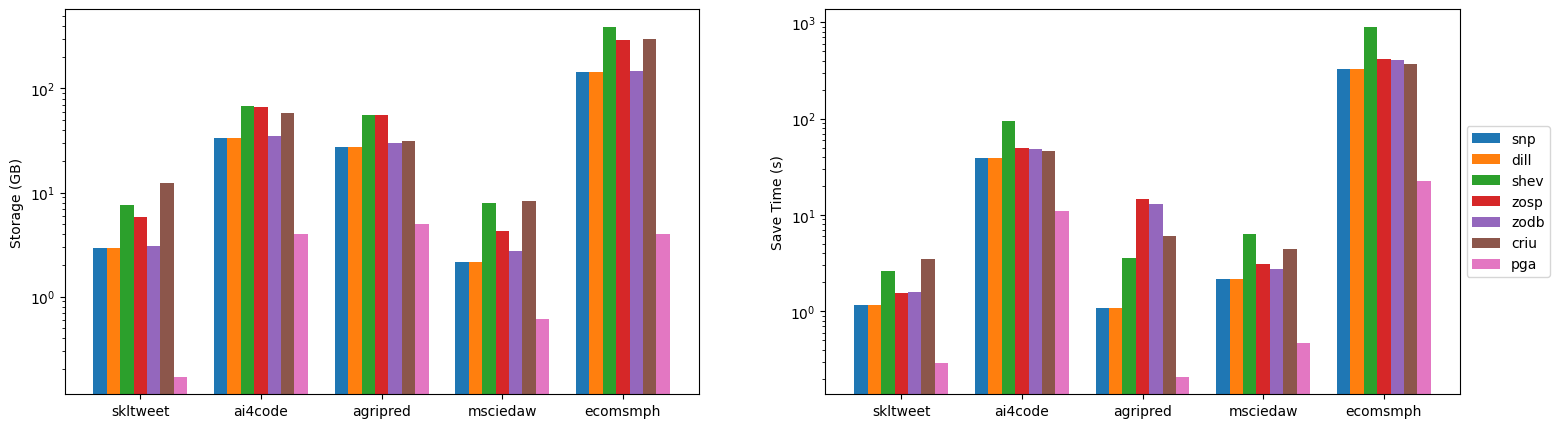

In [47]:
SZ, RS = 5, 1.8
fig, axs = plt.subplots(ncols=2, figsize=(SZ * RS * 2, SZ))

ax = axs[0]
xs = np.arange(len(exp_v_df["nb"].values))
bar_width = 1.0 / (len(suts) + 2)
bar_multiplier = -(len(suts) - 1) / 2
for sut in suts:
    offset = bar_width * bar_multiplier
    rects = ax.bar(xs + offset, exp_v_df[f"{sut}_storage_gb"], bar_width, label=sut)
    bar_multiplier += 1
ax.set_xticks(xs, exp_v_df["nb"])
ax.set_yscale("log")
ax.set_ylabel("Storage (GB)")

ax = axs[1]
xs = np.arange(len(exp_v_df["nb"].values))
bar_width = 1.0 / (len(suts) + 2)
bar_multiplier = -(len(suts) - 1) / 2
for sut in suts:
    offset = bar_width * bar_multiplier
    rects = ax.bar(xs + offset, exp_v_df[f"{sut}_avg_save_s"], bar_width, label=sut)
    bar_multiplier += 1
ax.set_xticks(xs, exp_v_df["nb"])
ax.set_yscale("log")
ax.set_ylabel("Save Time (s)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [48]:
exp_v_df[["nb", "pga_rel_storage_gb", "pga_rel_avg_save_s"]]

,nb,pga_rel_storage_gb,pga_rel_avg_save_s
0,skltweet,17.3$\times$,4.0$\times$
1,ai4code,8.3$\times$,3.6$\times$
2,agripred,5.5$\times$,5.2$\times$
3,msciedaw,3.5$\times$,4.6$\times$
4,ecomsmph,36.3$\times$,14.4$\times$


## 6. Scalability

Line plots of storage size over mutation rate + save time over object count

In [49]:
suts = [
    "snp",
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pga",
]
# tcs = ["10"]
# tvs = ["1e0", "1e1", "1e2", "1e3"]
# tls = ["1e3", "1e4", "1e5", "1e6"]
# tmls = ["1", "10", "100"]
# tmes = ["1", "10", "100"]
# tcs = ["2"]
# tvs = ["1e2"]
# tls = ["1e0", "1e1", "1e2", "1e3", "1e4", "1e5", "1e6"]
# tmls = ["5"]
# tmes = ["100"]
tcs = ["10"]
tvs = ["1e2"]
tls = ["1e0", "1e1", "1e2", "1e3", "1e4", "1e5", "1e6"]
tmls = ["1"]
tmes = ["100"]

suts_small = suts + ["exhaust"]
tcs_small = ["2"]
tvs_small = ["1", "2", "3"]
tls_small = ["1", "2", "3"]
tmls_small = ["1"]
tmes_small = ["100"]

def nb2(tc, tv, tl, tml, tme):
    return f"rmtree[exc][tc={tc}][tv={tv}][tl={tl}][tml={tml}][tme={tme}]/expstat.json"

def nb2_path(sut, tc, tv, tl, tml, tme):
    return f"{result_dir}/exp1_{sut}_{nb2(tc, tv, tl, tml, tme)}"

def extract_less(suts, baselines, tcs, tvs, tls, tmls, tmes):
    nb_paths = {
        nb2(tc, tv, tl, tml, tme): {
            s: nb2_path(s, tc, tv, tl, tml, tme) for s in suts
        } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)
    }
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "tc": int(float(tc)),
        "tv": int(float(tv)),
        "tl": int(float(tl)),
        "tml": int(float(tml)),
        "tme": int(float(tme)),
        "elemsize": 100,
        **all_results[nb2(tc, tv, tl, tml, tme)],
    } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)])


exp_vi_df = pd.concat([
    extract_less(suts, baselines=["snp"], tcs=tcs, tvs=tvs, tls=tls, tmls=tmls, tmes=tmes),
    extract_less(suts_small, baselines=["snp"], tcs=tcs_small, tvs=tvs_small, tls=tls_small, tmls=tmls_small, tmes=tmes_small),
])
# exp_vi_df = exp_vi_df.dropna(axis=0)
exp_vi_df["nsobj"] = exp_vi_df["tv"] * exp_vi_df["tl"] + exp_vi_df["tv"]
exp_vi_df["nssize"] = exp_vi_df["tv"] * exp_vi_df["tl"] * exp_vi_df["elemsize"] / 1e9
exp_vi_df = exp_vi_df.sort_values(["nssize"])
# exp_vi_df["roc"] = exp_vi_df["tv"] * (exp_vi_df["tml"] / 100.0) * exp_vi_df["tl"] * (exp_vi_df["tme"] / 100.0) * exp_vi_df["elemsize"] / 1e9
# exp_vi_df["roc_total"] = exp_vi_df["tc"] * exp_vi_df["tv"] * (exp_vi_df["tml"] / 100.0) * exp_vi_df["tl"] * (exp_vi_df["tme"] / 100.0) * exp_vi_df["elemsize"] / 1e9
# exp_vi_df["static_p"] = 1.0 - (exp_vi_df["tml"] / 100.0) * (exp_vi_df["tme"] / 100.0)
exp_vi_df

,tc,tv,tl,tml,tme,elemsize,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_n,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,snp_rel_n,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_n,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,dill_rel_n,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_n,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,shev_rel_n,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_n,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,zosp_rel_n,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_n,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zodb_rel_n,criu_storage_gb,criu_sum_save_s,criu_avg_save_s,criu_median_load_s,criu_n,criu_rel_storage_gb,criu_rel_sum_save_s,criu_rel_avg_save_s,criu_rel_median_load_s,criu_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n,exhaust_storage_gb,exhaust_sum_save_s,exhaust_avg_save_s,exhaust_median_load_s,exhaust_n,exhaust_rel_storage_gb,exhaust_rel_sum_save_s,exhaust_rel_avg_save_s,exhaust_rel_median_load_s,exhaust_rel_n,nsobj,nssize
0,2,1,1,1,100,100,3.560000e-07,0.000621,0.000207,0.000327,3,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,3.560000e-07,0.000576,0.000192,0.000318,3,1.0$\times$,1.1$\times$,1.1$\times$,1.0$\times$,1.0$\times$,0.000002,0.003012,0.001004,0.000665,3,0.2$\times$,0.21$\times$,0.21$\times$,0.49$\times$,1.0$\times$,0.000001,0.006747,0.002249,0.002782,3,0.26$\times$,0.09$\times$,0.09$\times$,0.12$\times$,1.0$\times$,9.610000e-07,0.001896,0.000632,0.000708,3,0.37$\times$,0.33$\times$,0.33$\times$,0.46$\times$,1.0$\times$,0.010794,0.106525,0.035508,1.710465,3,0.0$\times$,0.01$\times$,0.01$\times$,0.0$\times$,1.0$\times$,7.040000e-07,0.003871,0.001290,0.000737,3,0.51$\times$,0.16$\times$,0.16$\times$,0.44$\times$,1.0$\times$,7.040000e-07,0.038542,0.012847,0.000629,3.0,0.51$\times$,0.02$\times$,0.02$\times$,0.52$\times$,1.0$\times$,2,1.000000e-07
1,2,1,2,1,100,100,5.640000e-07,0.000507,0.000169,0.000313,3,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,5.640000e-07,0.000473,0.000158,0.000286,3,1.0$\times$,1.1$\times$,1.1$\times$,1.1$\times$,1.0$\times$,0.000002,0.002931,0.000977,0.000693,3,0.3$\times$,0.17$\times$,0.17$\times$,0.45$\times$,1.0$\times$,0.000002,0.032169,0.010723,0.002102,3,0.31$\times$,0.02$\times$,0.02$\times$,0.15$\times$,1.0$\times$,1.273000e-06,0.001916,0.000639,0.000763,3,0.44$\times$,0.26$\times$,0.26$\times$,0.41$\times$,1.0$\times$,0.010929,0.105242,0.035081,1.677796,3,0.0$\times$,0.0$\times$,0.0$\times$,0.0$\times$,1.0$\times$,8.080000e-07,0.003769,0.001256,0.000722,3,0.7$\times$,0.13$\times$,0.13$\times$,0.43$\times$,1.0$\times$,8.080000e-07,0.194373,0.064791,0.000661,3.0,0.7$\times$,0.0$\times$,0.0$\times$,0.47$\times$,1.0$\times$,3,2.000000e-07
3,2,2,1,1,100,100,5.820000e-07,0.000497,0.000166,0.000301,3,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,5.820000e-07,0.000590,0.000197,0.000333,3,1.0$\times$,0.84$\times$,0.84$\times$,0.9$\times$,1.0$\times$,0.000003,0.003092,0.001031,0.000783,3,0.2$\times$,0.16$\times$,0.16$\times$,0.38$\times$,1.0$\times$,0.000002,0.006685,0.002228,0.003055,3,0.32$\times$,0.07$\times$,0.07$\times$,0.1$\times$,1.0$\times$,1.300000e-06,0.002359,0.000786,0.000635,3,0.45$\times$,0.21$\times$,0.21$\times$,0.47$\times$,1.0$\times$,0.010967,0.110884,0.036961,1.752014,3,0.0$\times$,0.0$\times$,0.0$\times$,0.0$\times$,1.0$\times$,9.290000e-07,0.007475,0.002492,0.000940,3,0.63$\times$,0.07$\times$,0.07$\times$,0.32$\times$,1.0$\times$,9.320000e-07,1.052947,0.350982,0.000811,3.0,0.62$\times$,0.0$\times$,0.0$\times$,0.37$\times$,1.0$\times$,4,2.000000e-07
2,2,1,3,1,100,100,7.700000e-07,0.00

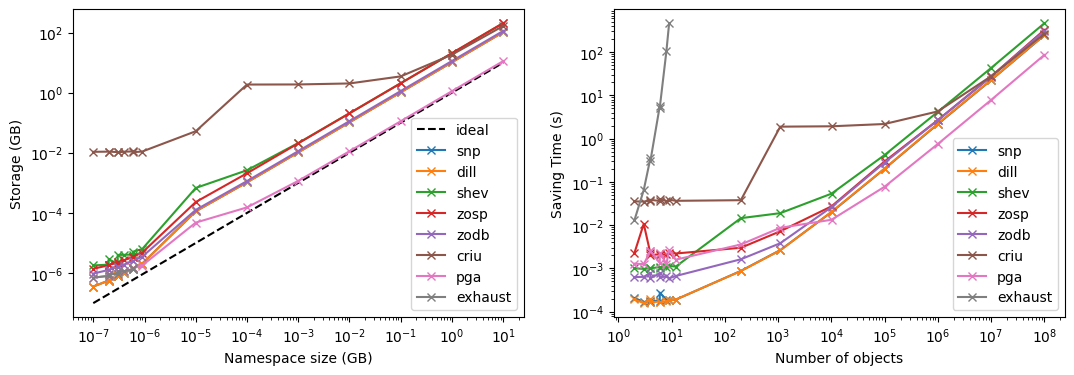

In [50]:
SZ, RS = 4, 1.6
fig, axs = plt.subplots(ncols=2, figsize=(SZ * RS * 2, SZ))

suts = suts_small
df = exp_vi_df

ax = axs[0]
xys = sorted(df["nssize"].values)
ax.plot(xys, xys, "--", c="k", label="ideal")
for sut in suts:
    sel_df = df.sort_values(["nssize"])
    ax.plot(sel_df["nssize"], sel_df[f"{sut}_storage_gb"], marker="x", label=sut)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Namespace size (GB)")
ax.set_ylabel("Storage (GB)")
ax.legend()

ax = axs[1]
for sut in suts:
    sel_df = df.sort_values(["nsobj"])
    ax.plot(sel_df["nsobj"], sel_df[f"{sut}_avg_save_s"], marker="x", label=sut)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Number of objects")
ax.set_ylabel("Saving Time (s)")
ax.legend()

plt.show()

In [51]:
exp_vi_df.pga_avg_save_s

0     0.001290
1     0.001256
3     0.002492
2     0.002504
6     0.001346
4     0.002299
5     0.001281
7     0.002664
8     0.001593
0     0.003579
1     0.008690
2     0.013351
3     0.077372
4     0.752248
5     7.811401
6    86.009222
Name: pga_avg_save_s, dtype: float64

exp_vi_df.pga_storage_gb / exp_vi_df.exhaust_storage_gb

Merge exhaustive into scalability

In [52]:
exp_vi_df.to_csv("plots/exp_vi.txt", index_label="index", sep=" ", na_rep="nan")

### Exhaustive Comparison (Merged into 6.)

Line plots of suboptimal storage size over mutation rate + save time over object count

In [53]:
suts = [
    "exhaust",
    "pga",
]
tcs = ["2"]
tvs = ["1", "2", "3"]
tls = ["1", "2", "3"]
tmls = ["1", "10", "100"]
tmes = ["1", "10", "100"]

def nb2(tc, tv, tl, tml, tme):
    return f"rmtree[exc][tc={tc}][tv={tv}][tl={tl}][tml={tml}][tme={tme}]/expstat.json"

def nb2_path(sut, tc, tv, tl, tml, tme):
    return f"{result_dir}/exp1_{sut}_{nb2(tc, tv, tl, tml, tme)}"

def extract_exhaustive(suts, baselines):
    nb_paths = {
        nb2(tc, tv, tl, tml, tme): {
            s: nb2_path(s, tc, tv, tl, tml, tme) for s in suts
        } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)
    }
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "tc": int(float(tc)),
        "tv": int(float(tv)),
        "tl": int(float(tl)),
        "tml": int(float(tml)),
        "tme": int(float(tme)),
        "elemsize": 100,
        **all_results[nb2(tc, tv, tl, tml, tme)],
    } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)])


exp_viii_df = extract_exhaustive(suts, baselines=["exhaust"])
exp_viii_df = exp_viii_df.dropna(axis=0)
exp_viii_df["numobj"] = exp_viii_df["tv"] * exp_viii_df["tl"]
exp_viii_df["roc"] = exp_viii_df["tv"] * (exp_viii_df["tml"] / 100.0) * exp_viii_df["tl"] * (exp_viii_df["tme"] / 100.0) * exp_viii_df["elemsize"] / 1e9
exp_viii_df

,tc,tv,tl,tml,tme,elemsize,exhaust_storage_gb,exhaust_sum_save_s,exhaust_avg_save_s,exhaust_median_load_s,exhaust_n,exhaust_rel_storage_gb,exhaust_rel_sum_save_s,exhaust_rel_avg_save_s,exhaust_rel_median_load_s,exhaust_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n,numobj,roc
0,2,1,1,1,1,100,7.040000e-07,0.144422,0.048141,0.000575,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.040000e-07,0.008039,0.002680,0.001083,3,1.0$\times$,18.0$\times$,18.0$\times$,0.53$\times$,1.0$\times$,1,1.000000e-11
1,2,1,1,1,10,100,7.040000e-07,0.040494,0.013498,0.000551,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.040000e-07,0.005826,0.001942,0.000834,3,1.0$\times$,7.0$\times$,7.0$\times$,0.66$\times$,1.0$\times$,1,1.000000e-10
2,2,1,1,1,100,100,7.040000e-07,0.038542,0.012847,0.000629,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.040000e-07,0.003871,0.001290,0.000737,3,1.0$\times$,10.0$\times$,10.0$\times$,0.85$\times$,1.0$\times$,1,1.000000e-09
3,2,1,1,10,1,100,7.040000e-07,0.040749,0.013583,0.000658,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.040000e-07,0.008127,0.002709,0.000979,3,1.0$\times$,5.0$\times$,5.0$\times$,0.67$\times$,1.0$\times$,1,1.000000e-10
4,2,1,1,10,10,100,7.040000e-07,0.039683,0.013228,0.000659,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,7.040000e-07,0.009215,0.003072,0.000849,3,1.0$\times$,4.3$\times$,4.3$\times$,0.78$\times$,1.0$\times$,1,1.000000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2,3,2,10,10,100,1.477000e-06,1401.101431,467.033810,0.000861,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.465000e-06,0.026338,0.008779,0.000820,3,1.0$\times$,53197.7$\times$,53197.7$\times$,1.1$\times$,1.0$\times$,6,6.000000e-09
68,2,3,2,10,100,100,1.477000e-06,1408.960809,469.653603,0.000740,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.465000e-06,0.008103,0.002701,0.000884,3,1.0$\times$,173888.8$\times$,173888.8$\times$,0.84$\times$,1.0$\times$,6,6.000000e-08
69,2,3,2,100,1,100,1.477000e-06,1392.476325,464.158775,0.000798,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.465000e-06,0.008542,0.002847,0.001084,3,1.0$\times$,163009.5$\times$,163009.5$\times$,0.74$\times$,1.0$\times$,6,6.000000e-09
70,2,3,2,100,10,100,1.477000e-06,1402.307124,467.435708,0.000812,3.0,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.465000e-06,0.007468,0.002489,0.000876,3,1.0$\times$,187781.8$\times$,187781.8$\times$,0.93$\times$,1.0$\times$,6,6.000000e-08


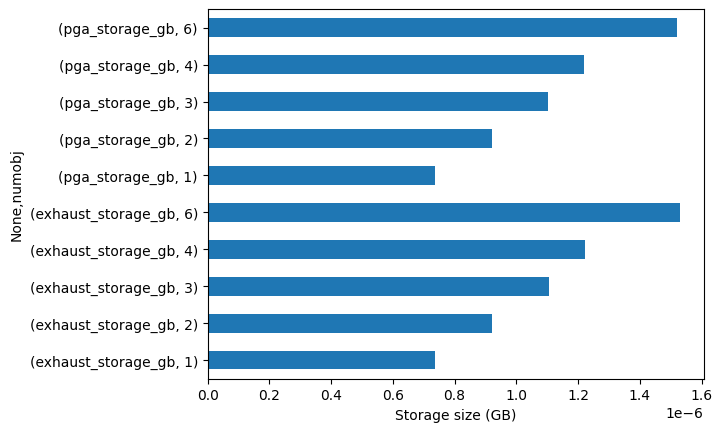

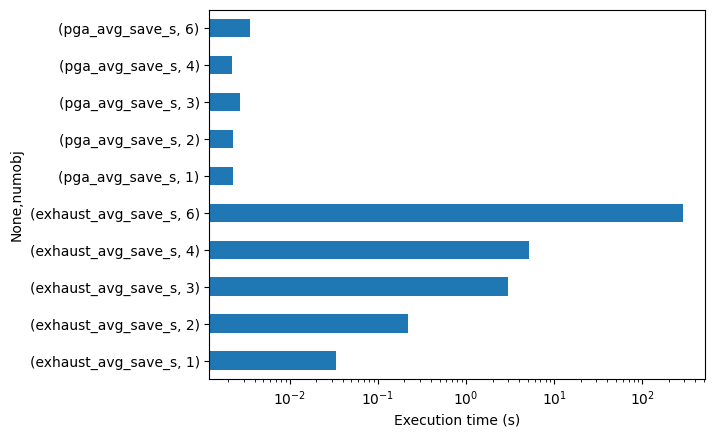

In [54]:
ax = pd.DataFrame(exp_viii_df.groupby(["numobj"])[["exhaust_storage_gb", "pga_storage_gb"]].mean()).unstack(1).plot.barh()
ax.set_xlabel("Storage size (GB)")
plt.show()
ax = pd.DataFrame(exp_viii_df.groupby(["numobj"])[["exhaust_avg_save_s", "pga_avg_save_s"]].mean()).unstack(1).plot.barh()
ax.set_xlabel("Execution time (s)")
ax.set_xscale("log")
plt.show()

In [55]:
np.sort((exp_viii_df["exhaust_storage_gb"] / exp_viii_df["pga_storage_gb"]).values)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.00082237, 1.00210084, 1.00218818,
       1.00218818, 1.00218818, 1.00218818, 1.00218818, 1.00218818,
       1.00218818, 1.00218818, 1.00263852, 1.00263852, 1.00263852,
       1.00263852, 1.00263852, 1.00263852, 1.00263852, 1.00263852,
       1.00266809, 1.00322928, 1.00322928, 1.00322928, 1.00322928,
       1.00322928, 1.00322928, 1.00322928, 1.00322928, 1.00342936,
       1.00346921, 1.00346921, 1.00346921, 1.00346921, 1.00346921,
       1.00346921, 1.00346921, 1.00346921, 1.00367261, 1.00652742,
       1.00667161, 1.00667161, 1.00667161, 1.00667161, 1.00667161,
       1.00667161, 1.00667161, 1.00667161, 1.00819113, 1.00819113,
       1.00819113, 1.00819113, 1.00819113, 1.00819113, 1.00819113,
       1.00819113, 1.0083004 ])

<Axes: xlabel='tvtl'>

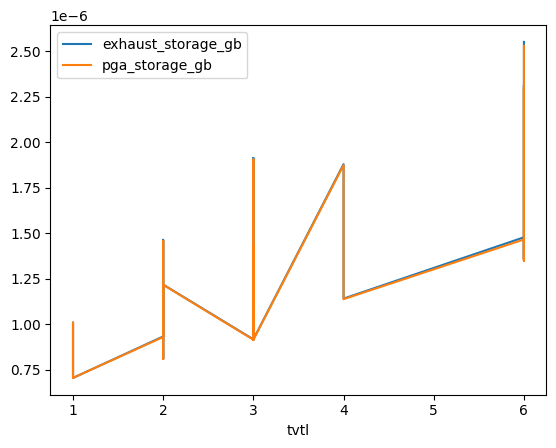

In [56]:
exp_viii_df["tvtl"] = exp_viii_df["tv"] * exp_viii_df["tl"]
exp_viii_df.sort_values(["tvtl"])[["tvtl", "exhaust_storage_gb", "pga_storage_gb"]].plot("tvtl")

## 7. By Characteristic (Mutation Rate)

By mutation rate.

In [57]:
suts = [
    "snp",
    "dill",
    "shev",
    "zosp",
    "zodb",
    "criu",
    "pga"
]
# tcs = ["2"]
tcs = ["10"]
tvs = ["1e2"]
tls = ["1e5"]
tmls = ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
tmes = ["100"]

def nb2(tc, tv, tl, tml, tme):
    return f"rmtree[exc][tc={tc}][tv={tv}][tl={tl}][tml={tml}][tme={tme}]/expstat.json"

def nb2_path(sut, tc, tv, tl, tml, tme):
    return f"{result_dir}/exp1_{sut}_{nb2(tc, tv, tl, tml, tme)}"

def extract_less(suts, baselines):
    nb_paths = {
        nb2(tc, tv, tl, tml, tme): {
            s: nb2_path(s, tc, tv, tl, tml, tme) for s in suts
        } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)
    }
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "tc": int(float(tc)),
        "tv": int(float(tv)),
        "tl": int(float(tl)),
        "tml": int(float(tml)),
        "tme": int(float(tme)),
        "elemsize": 100,
        **all_results[nb2(tc, tv, tl, tml, tme)],
    } for tc, tv, tl, tml, tme in itertools.product(tcs, tvs, tls, tmls, tmes)])


exp_vii_df = extract_less(suts, baselines=["snp"])
exp_vii_df

,tc,tv,tl,tml,tme,elemsize,snp_storage_gb,snp_sum_save_s,snp_avg_save_s,snp_median_load_s,snp_n,snp_rel_storage_gb,snp_rel_sum_save_s,snp_rel_avg_save_s,snp_rel_median_load_s,snp_rel_n,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_n,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,dill_rel_n,shev_storage_gb,shev_sum_save_s,shev_avg_save_s,shev_median_load_s,shev_n,shev_rel_storage_gb,shev_rel_sum_save_s,shev_rel_avg_save_s,shev_rel_median_load_s,shev_rel_n,zosp_storage_gb,zosp_sum_save_s,zosp_avg_save_s,zosp_median_load_s,zosp_n,zosp_rel_storage_gb,zosp_rel_sum_save_s,zosp_rel_avg_save_s,zosp_rel_median_load_s,zosp_rel_n,zodb_storage_gb,zodb_sum_save_s,zodb_avg_save_s,zodb_median_load_s,zodb_n,zodb_rel_storage_gb,zodb_rel_sum_save_s,zodb_rel_avg_save_s,zodb_rel_median_load_s,zodb_rel_n,criu_storage_gb,criu_sum_save_s,criu_avg_save_s,criu_median_load_s,criu_n,criu_rel_storage_gb,criu_rel_sum_save_s,criu_rel_avg_save_s,criu_rel_median_load_s,criu_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n
0,10,100,100000,0,100,100,10.301622,243.345028,22.122275,13.516552,11,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,10.301622,247.094250,22.463114,13.485166,11,1.0$\times$,0.98$\times$,0.98$\times$,1.0$\times$,1.0$\times$,20.603643,465.580428,42.325493,27.234206,11,0.5$\times$,0.52$\times$,0.52$\times$,0.5$\times$,1.0$\times$,20.603248,324.582896,29.507536,14.579818,11,0.5$\times$,0.75$\times$,0.75$\times$,0.93$\times$,1.0$\times$,11.331786,300.484635,27.316785,14.816872,11,0.91$\times$,0.81$\times$,0.81$\times$,0.91$\times$,1.0$\times$,18.006813,293.008431,26.637130,41.767916,11,0.57$\times$,0.83$\times$,0.83$\times$,0.32$\times$,1.0$\times$,1.030217,84.024620,7.638602,16.537598,11,10.0$\times$,2.9$\times$,2.9$\times$,0.82$\times$,1.0$\times$
1,10,100,100000,10,100,100,10.301622,258.391674,23.490152,13.468416,11,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,10.301622,261.854804,23.804982,13.787797,11,1.0$\times$,0.99$\times$,0.99$\times$,0.98$\times$,1.0$\times$,20.603643,493.673573,44.879416,27.758109,11,0.5$\times$,0.52$\times$,0.52$\times$,0.49$\times$,1.0$\times$,20.603248,332.073732,30.188521,14.930155,11,0.5$\times$,0.78$\times$,0.78$\times$,0.9$\times$,1.0$\times$,11.331786,310.893113,28.263010,14.590160,11,0.91$\times$,0.83$\times$,0.83$\times$,0.92$\times$,1.0$\times$,18.141386,308.026726,28.002430,41.219329,11,0.57$\times$,0.84$\times$,0.84$\times$,0.33$\times$,1.0$\times$,1.957430,128.798688,11.708972,16.259437,11,5.3$\times$,2.0$\times$,2.0$\times$,0.83$\times$,1.0$\times$
2,10,100,100000,20,100,100,10.301622,263.928603,23.993509,13.325603,11,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,10.301622,267.628216,24.329838,13.599800,11,1.0$\times$,0.99$\times$,0.99$\times$,0.98$\times$,1.0$\times$,20.603643,502.906114,45.718738,27.391516,11,0.5$\times$,0.52$\times$,0.52$\times$,0.49$\times$,1.0$\times$,20.603248,336.291790,30.571981,14.700243,11,0.5$\times$,0.78$\times$,0.78$\times$,0.91$\times$,1.0$\times$,11.331786,312.789267,28.435388,14.720877,11,0.91$\times$,0.84$\times$,0.84$\times$,0.91$\times$,1.0$\times$,18.409066,302.026582,27.456962,41.072590,11,0.56$\times$,0.87$\times$,0.87$\times$,0.32$\times$,1.0$\times$,2.884622,178.163866,16.196715,15.981006,11,3.6$\times$,1.5$\times$,1.5$\times$,0.83$\times$,1.0$\times$
3,10,100,100000,30,100,100,10.301622,272.328880,24.757171,13.569114,11,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,10.301622,269.000690,24.454608,13.633159,11,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,20.603643,507.114197,46.101291,27.615822,11,0.5$\times$,0.54$\times$,0.54$\times$,0.49$\times$,1.0$\times$,20.603248,300.843967,27.349452,14.838063,11,0.5$\times$,0.91$\times$,0.91$\times$,0.91$\times$,1.0$\times$,11.331786,308.768809,28.069892,14.654450,11,0.91$\times$,

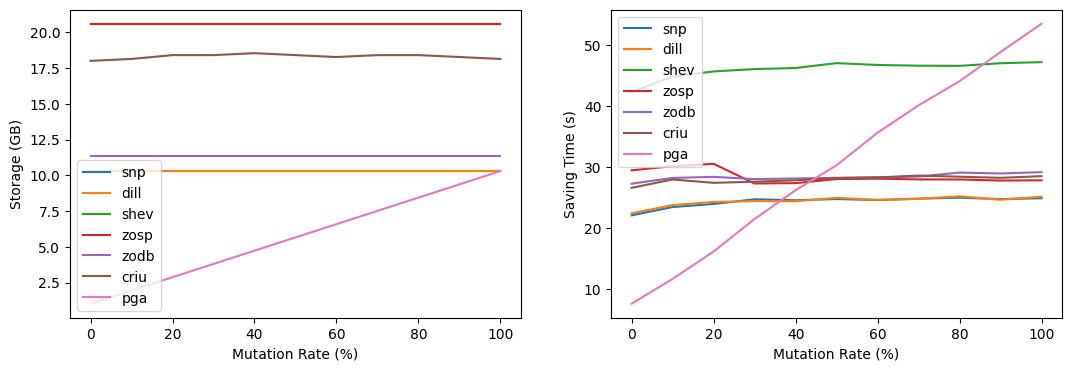

In [58]:
df = exp_vii_df

SZ, RS = 4, 1.6
fig, axs = plt.subplots(ncols=2, figsize=(SZ * RS * 2, SZ))

ax = axs[0]
for sut in suts:
    ax.plot(df["tml"], df[f"{sut}_storage_gb"], label=sut)
ax.set_xlabel("Mutation Rate (%)")
ax.set_ylabel("Storage (GB)")
ax.legend()

ax = axs[1]
for sut in suts:
    ax.plot(df["tml"], df[f"{sut}_avg_save_s"], label=sut)
ax.set_xlabel("Mutation Rate (%)")
ax.set_ylabel("Saving Time (s)")
ax.legend()

plt.show()

In [59]:
exp_vii_df.to_csv("plots/exp_vii_mr.txt", index_label="index", sep=" ")

### Characteristics (RE, AP, WR)

Bar plot (storage + save time) over read-only, append-only, update

In [60]:
suts = [
    "dill",
    # "shev",
    # "zosp",
    # "zodb",
    # "criu",
    "pga",
]
nbs = [
    "nbreadon",
    "nbappend",
    "nbupdate",
]
nbstrs = {
    "nbreadon": "RE",
    "nbappend": "AP",
    "nbupdate": "WR",
}

def result_path(sut, nb):
    return f"{result_dir}/exp1_{sut}_{nb}/expstat.json"

def extract_less(suts, nbs, baselines):
    nb_paths = {
        nb: {
            s: result_path(s, nb) for s in suts
        } for nb in nbs
    }
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    return pd.DataFrame([{
        "nb": nb,
        "nbstr": nbstrs[nb],
        **all_results[nb],
    } for nb in nbs])


exp_vii_df = extract_less(suts, nbs, baselines=["dill"])
for sut in suts:
    exp_vii_df[f"inv_{sut}_rel_storage_gb"] = exp_vii_df[f"{sut}_storage_gb"] / exp_vii_df["dill_storage_gb"]
    exp_vii_df[f"inv_{sut}_rel_avg_save_s"] = exp_vii_df[f"{sut}_avg_save_s"] / exp_vii_df["dill_avg_save_s"]
exp_vii_df

,nb,nbstr,dill_storage_gb,dill_sum_save_s,dill_avg_save_s,dill_median_load_s,dill_n,dill_rel_storage_gb,dill_rel_sum_save_s,dill_rel_avg_save_s,dill_rel_median_load_s,dill_rel_n,pga_storage_gb,pga_sum_save_s,pga_avg_save_s,pga_median_load_s,pga_n,pga_rel_storage_gb,pga_rel_sum_save_s,pga_rel_avg_save_s,pga_rel_median_load_s,pga_rel_n,inv_dill_rel_storage_gb,inv_dill_rel_avg_save_s,inv_pga_rel_storage_gb,inv_pga_rel_avg_save_s
0,nbreadon,RE,2.574113,53.544858,2.328037,1.455787,23,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.109071,38.665716,1.681118,1.959307,23,23.6$\times$,1.4$\times$,1.4$\times$,0.74$\times$,1.0$\times$,1.0,1.0,0.042372,0.722118
1,nbappend,AP,0.079880,0.045812,0.003272,0.002067,14,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.012301,0.068568,0.004898,0.005967,14,6.5$\times$,0.67$\times$,0.67$\times$,0.35$\times$,1.0$\times$,1.0,1.0,0.153990,1.496724
2,nbupdate,WR,0.558031,12.207213,0.871944,0.011829,14,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.182050,15.792037,1.128003,0.019783,14,3.1$\times$,0.77$\times$,0.77$\times$,0.6$\times$,1.0$\times$,1.0,1.0,0.326237,1.293664


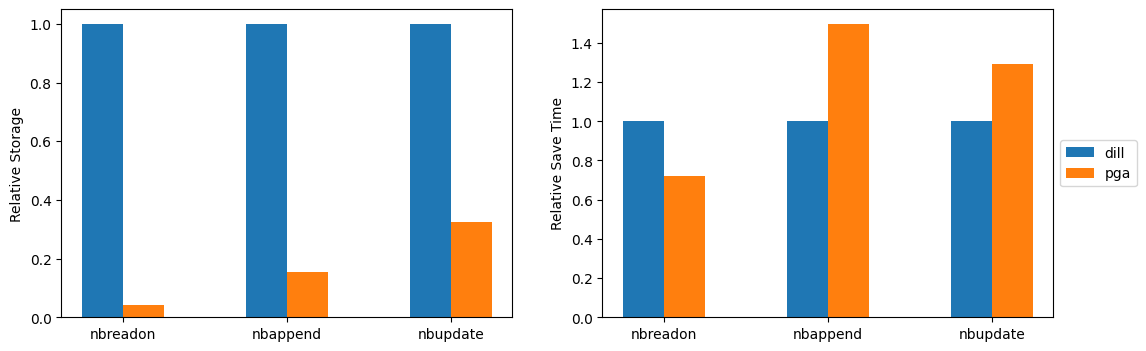

In [61]:
SZ, RS = 4, 1.6
fig, axs = plt.subplots(ncols=2, figsize=(SZ * RS * 2, SZ))

ax = axs[0]
xs = np.arange(len(exp_vii_df["nb"].values))
bar_width = 1.0 / (len(suts) + 2)
bar_multiplier = -(len(suts) - 1) / 2
for sut in suts:
    offset = bar_width * bar_multiplier
    rects = ax.bar(xs + offset, exp_vii_df[f"inv_{sut}_rel_storage_gb"], bar_width, label=sut)
    # ax.bar_label(rects, fmt="%.2f", rotation=90, padding=3)
    bar_multiplier += 1
ax.set_xticks(xs, exp_vii_df["nb"])
# ax.set_yscale("log")
ax.set_ylabel("Relative Storage")

ax = axs[1]
xs = np.arange(len(exp_vii_df["nb"].values))
bar_width = 1.0 / (len(suts) + 2)
bar_multiplier = -(len(suts) - 1) / 2
for sut in suts:
    offset = bar_width * bar_multiplier
    rects = ax.bar(xs + offset, exp_vii_df[f"inv_{sut}_rel_avg_save_s"], bar_width, label=sut)
    # ax.bar_label(rects, fmt="%.2f", rotation=90, padding=3)
    bar_multiplier += 1
ax.set_xticks(xs, exp_vii_df["nb"])
# ax.set_yscale("log")
ax.set_ylabel("Relative Save Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [62]:
exp_vii_df.to_csv("plots/exp_vii.txt", index_label="index", sep=" ")

## 10. Lock Overhead

Table comparing noop and pgnoop

In [63]:
suts = [
    "noop",
    "pgnoop",
]
nbs = [
    "skltweet",
    "ai4code",
    "agripred",
    "msciedaw",
    "ecomsmph",
]
rdxs = list(range(10))

def result_path(sut, nb):
    return f"{result_dir}/exp1_{sut}_{nb}/expstat.json"

def result_path_rdx(sut, nb, rdx):
    return f"{result_dir}/exp1_{sut}_{nb}[n={rdx}]/expstat.json"

def read_exec_times(suts, nbs, rdxs, baselines):
    all_exec_times = []
    for nb in nbs:
        for rdx in rdxs:
            for sut in suts:
                result = read_result(result_path_rdx(sut, nb, rdx))
                for cell_id, exec_time in enumerate(result["exec_times"]):
                    row = {}
                    row["nb"] = nb
                    row["rdx"] = rdx
                    row["sut"] = sut
                    row["cell_id"] = cell_id
                    row["exec_s"] = exec_time
                    all_exec_times.append(row)
    return all_exec_times

def extract_less(suts, nbs, rdxs, baselines):
    nb_paths = {
        nb: {
            s: result_path(s, nb) for s in suts
        } for nb in nbs
    }
    all_results = parse_all_nbs(nb_paths, baselines=baselines)
    all_exec_times = read_exec_times(suts, nbs, rdxs, baselines)
    return (
        pd.DataFrame([{"nb": nb, **all_results[nb]} for nb in nbs]),
        pd.DataFrame(all_exec_times),
    )


exp_c_df, exp_c_exec_df = extract_less(suts, nbs, rdxs, baselines=["noop"])
display(exp_c_df)
display(exp_c_exec_df)

,nb,noop_storage_gb,noop_sum_save_s,noop_avg_save_s,noop_median_load_s,noop_n,noop_rel_storage_gb,noop_rel_sum_save_s,noop_rel_avg_save_s,noop_rel_median_load_s,noop_rel_n,pgnoop_storage_gb,pgnoop_sum_save_s,pgnoop_avg_save_s,pgnoop_median_load_s,pgnoop_n,pgnoop_rel_storage_gb,pgnoop_rel_sum_save_s,pgnoop_rel_avg_save_s,pgnoop_rel_median_load_s,pgnoop_rel_n
0,skltweet,0.0,0.000272,0.000006,0.000439,45,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.0,0.000158,0.000004,0.000317,45,0$\times$,1.7$\times$,1.7$\times$,1.4$\times$,1.0$\times$
1,ai4code,0.0,0.000249,0.000011,0.000424,22,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.0,0.000166,0.000008,0.000422,22,0$\times$,1.5$\times$,1.5$\times$,1.0$\times$,1.0$\times$
2,agripred,0.0,0.000217,0.000014,0.000445,16,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.0,0.000083,0.000005,0.000327,16,0$\times$,2.6$\times$,2.6$\times$,1.4$\times$,1.0$\times$
3,msciedaw,0.0,0.000454,0.000016,0.000420,29,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.0,0.000276,0.000010,0.000417,29,0$\times$,1.6$\times$,1.6$\times$,1.0$\times$,1.0$\times$
4,ecomsmph,0.0,0.000302,0.000007,0.000409,42,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,1.0$\times$,0.0,0.000130,0.000003,0.000327,42,0$\times$,2.3$\times$,2.3$\times$,1.3$\times$,1.0$\times$


,nb,rdx,sut,cell_id,exec_s
0,skltweet,0,noop,0,0.142322
1,skltweet,0,noop,1,0.000075
2,skltweet,0,noop,2,1.623245
3,skltweet,0,noop,3,0.110117
4,skltweet,0,noop,4,25.780813
...,...,...,...,...,...
2975,ecomsmph,9,pgnoop,36,0.011488
2976,ecomsmph,9,pgnoop,37,13.725784
2977,ecomsmph,9,pgnoop,38,0.009883
2978,ecomsmph,9,pgnoop,39,0.009638


In [64]:
agg_df = pd.DataFrame(exp_c_exec_df.groupby(["nb", "rdx", "sut"]).sum().groupby(["nb", "sut"]).agg(["mean", "std"])["exec_s"])
agg_df

mean        std
nb       sut                          
agripred noop    308.752420   6.526969
         pgnoop  312.943107   7.931319
ai4code  noop    847.254915  45.040264
         pgnoop  863.834050  40.870348
ecomsmph noop    153.992855  11.274336
         pgnoop  158.736920  12.877681
msciedaw noop    486.852832   7.103432
         pgnoop  479.181754  10.943186
skltweet noop     85.791047   0.450171
         pgnoop   89.777052   0.713057

Text(0.5, 0, 'Execution time (s)')

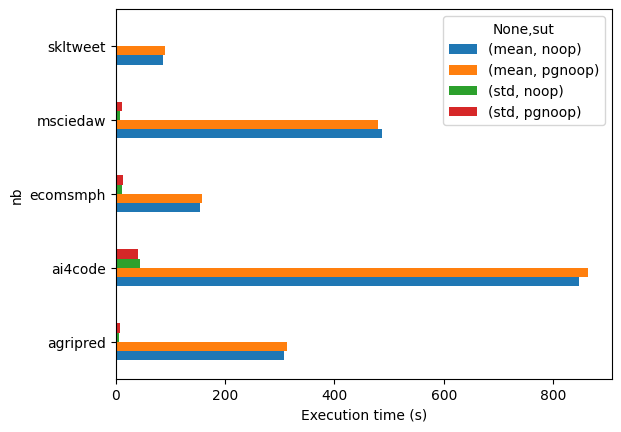

In [65]:
ax = agg_df.unstack(1).plot.barh()
ax.set_xlabel("Execution time (s)")

In [66]:
nb_idxs = {
    "skltweet": 0,
    "ai4code": 1,
    "agripred": 2,
    "msciedaw": 3,
    "ecomsmph": 4,
}
exp_c_exec_df_summary = agg_df.unstack(1)
exp_c_exec_df_summary = exp_c_exec_df_summary.reset_index()
exp_c_exec_df_summary.columns = ["nb", "noop", "pgnoop", "noopstd", "pgnoopstd"]
exp_c_exec_df_summary = exp_c_exec_df_summary.set_index([[nb_idxs[nb] for nb in exp_c_exec_df_summary["nb"]]])
exp_c_exec_df_summary["overhead"] = list(map(lambda x: f"{x:.1f}\%", 100 * (exp_c_exec_df_summary["pgnoop"] - exp_c_exec_df_summary["noop"]) / exp_c_exec_df_summary["noop"]))
exp_c_exec_df_summary["noopstdtwo"] = exp_c_exec_df_summary["noopstd"] * 2
exp_c_exec_df_summary["pgnoopstdtwo"] = exp_c_exec_df_summary["pgnoopstd"] * 2
exp_c_exec_df_summary

,nb,noop,pgnoop,noopstd,pgnoopstd,overhead,noopstdtwo,pgnoopstdtwo
2,agripred,308.752420,312.943107,6.526969,7.931319,1.4\%,13.053937,15.862639
1,ai4code,847.254915,863.834050,45.040264,40.870348,2.0\%,90.080527,81.740696
4,ecomsmph,153.992855,158.736920,11.274336,12.877681,3.1\%,22.548671,25.755362
3,msciedaw,486.852832,479.181754,7.103432,10.943186,-1.6\%,14.206864,21.886373
0,skltweet,85.791047,89.777052,0.450171,0.713057,4.6\%,0.900342,1.426115


In [67]:
exp_c_exec_df_summary.to_csv("plots/exp_c.txt", index_label="index", sep=" ")